In [279]:
import pandas as pd

import sys 

import numpy as np

import seaborn as sns

from math import sqrt

from pylab import rcParams



from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn import linear_model

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV



import sklearn

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import ElasticNet, Lasso

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.kernel_ridge import KernelRidge



from sklearn.ensemble import StackingRegressor



from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler



%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [281]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [282]:
train.shape

(1460, 81)

In [285]:
test.shape

(1459, 80)

In [286]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [287]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [290]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [293]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

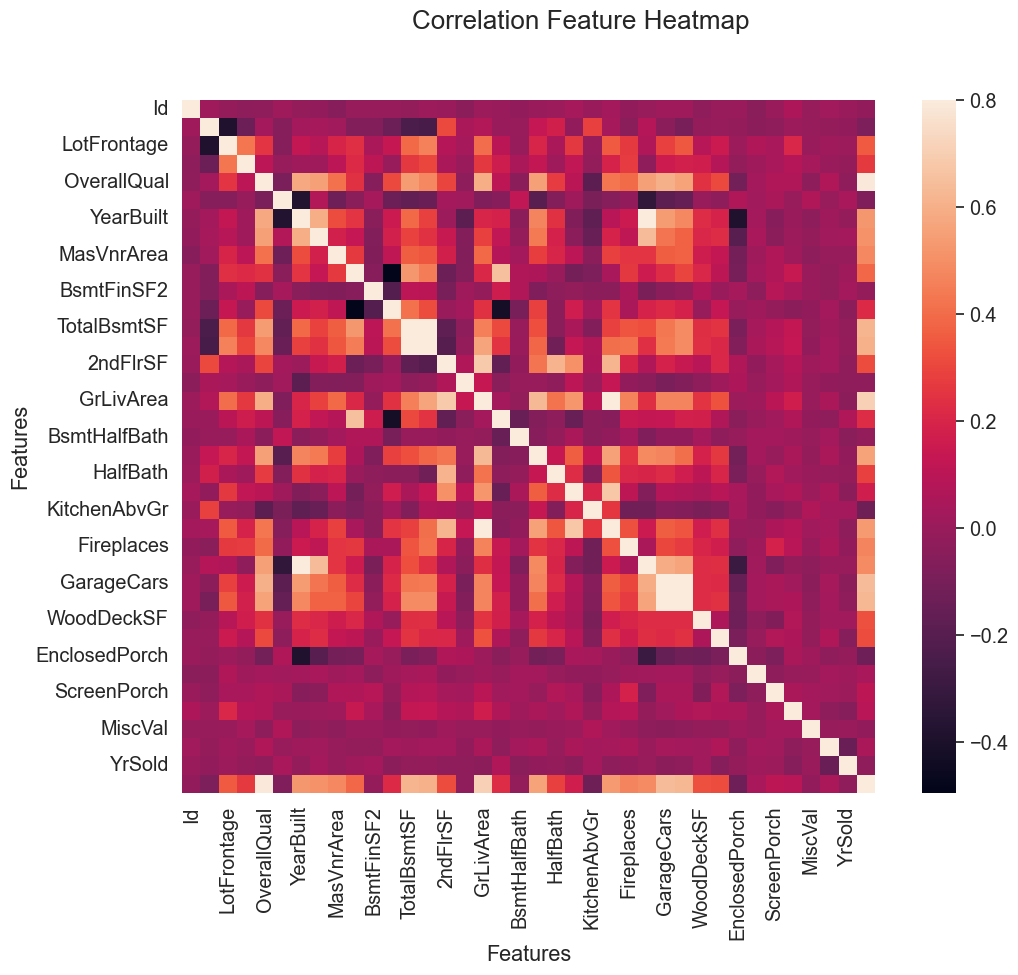

In [294]:
# Select only numeric columns from the DataFrame
numeric_df = train.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_mat = numeric_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap
sns.heatmap(corr_mat, vmax=.8, square=True)

# Set the title and labels
plt.suptitle("Correlation Feature Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

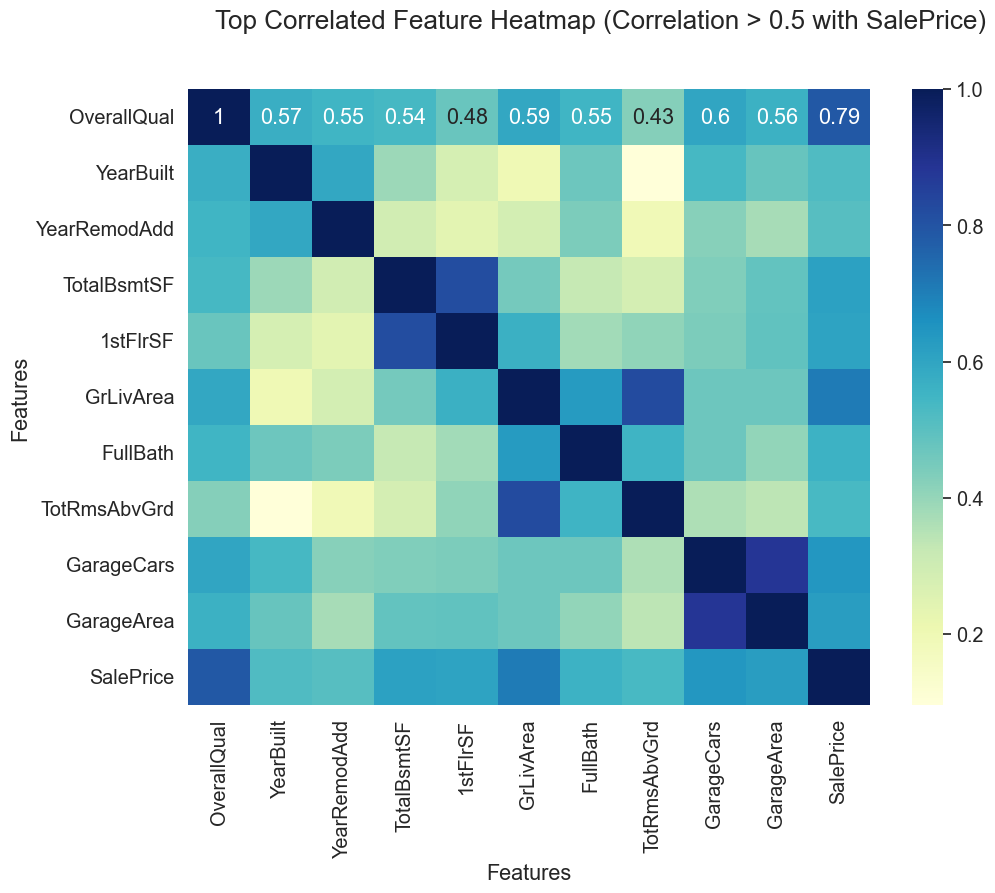

In [296]:
# Compute the correlation matrix for numeric columns
corr_mat = train.select_dtypes(include=['float64', 'int64']).corr()

# Set the font scale and figure size for the heatmap
sns.set(font_scale=1.3)
plt.figure(figsize=(11, 8))

# Select features with correlation higher than 0.5 with 'SalePrice'
top_corr = corr_mat.index[abs(corr_mat["SalePrice"]) > 0.5]

# Plot heatmap for top correlated features
g = sns.heatmap(train[top_corr].corr(), annot=True, cmap="YlGnBu")

# Set title and labels
plt.suptitle("Top Correlated Feature Heatmap (Correlation > 0.5 with SalePrice)")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

In [297]:
# Compute the correlation matrix for numeric columns
numeric_df = train.select_dtypes(include=['float64', 'int64'])

# Drop 'SalePrice' from the correlation matrix
corr = numeric_df.corr().drop('SalePrice')

# Sort the correlation values with 'SalePrice' in descending order
corr_sorted = corr['SalePrice'].sort_values(ascending=False)

# Print sorted correlation values
print("Correlation Values")
print(corr_sorted)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

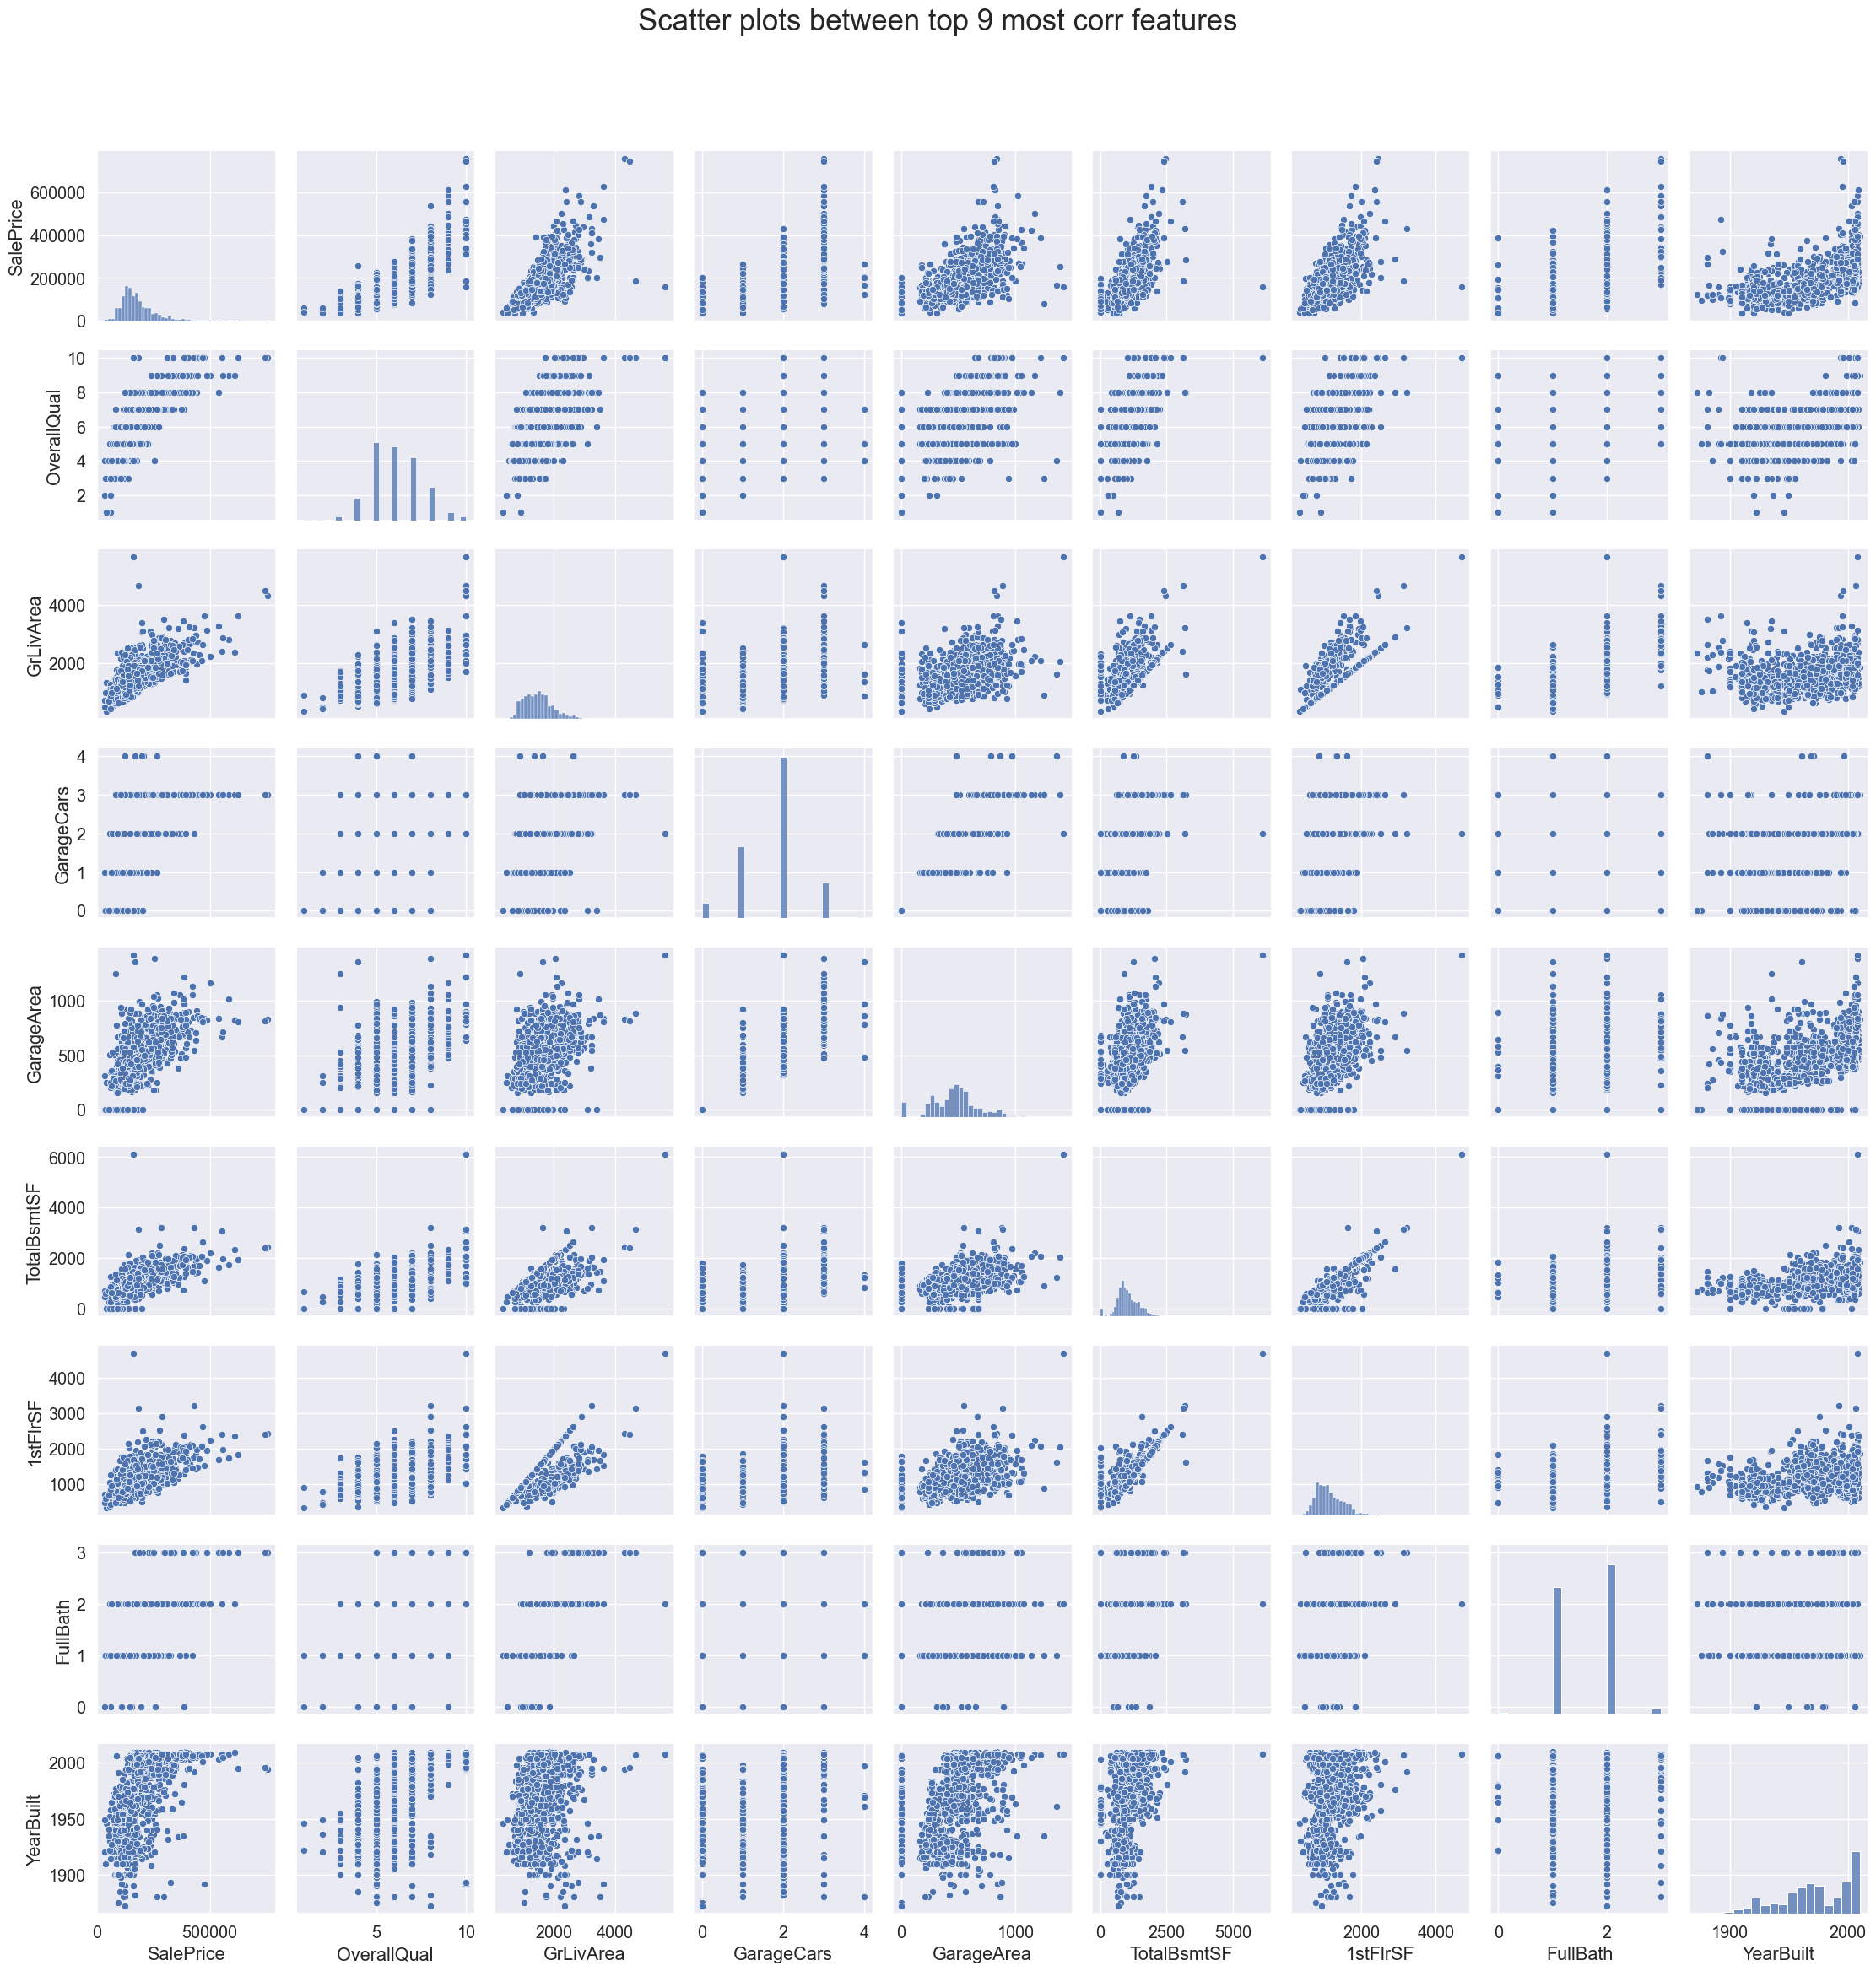

In [298]:
rcParams['figure.figsize'] = 5,5

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']

sns_plot = sns.pairplot(train[cols])



plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)

plt.tight_layout()

plt.show()

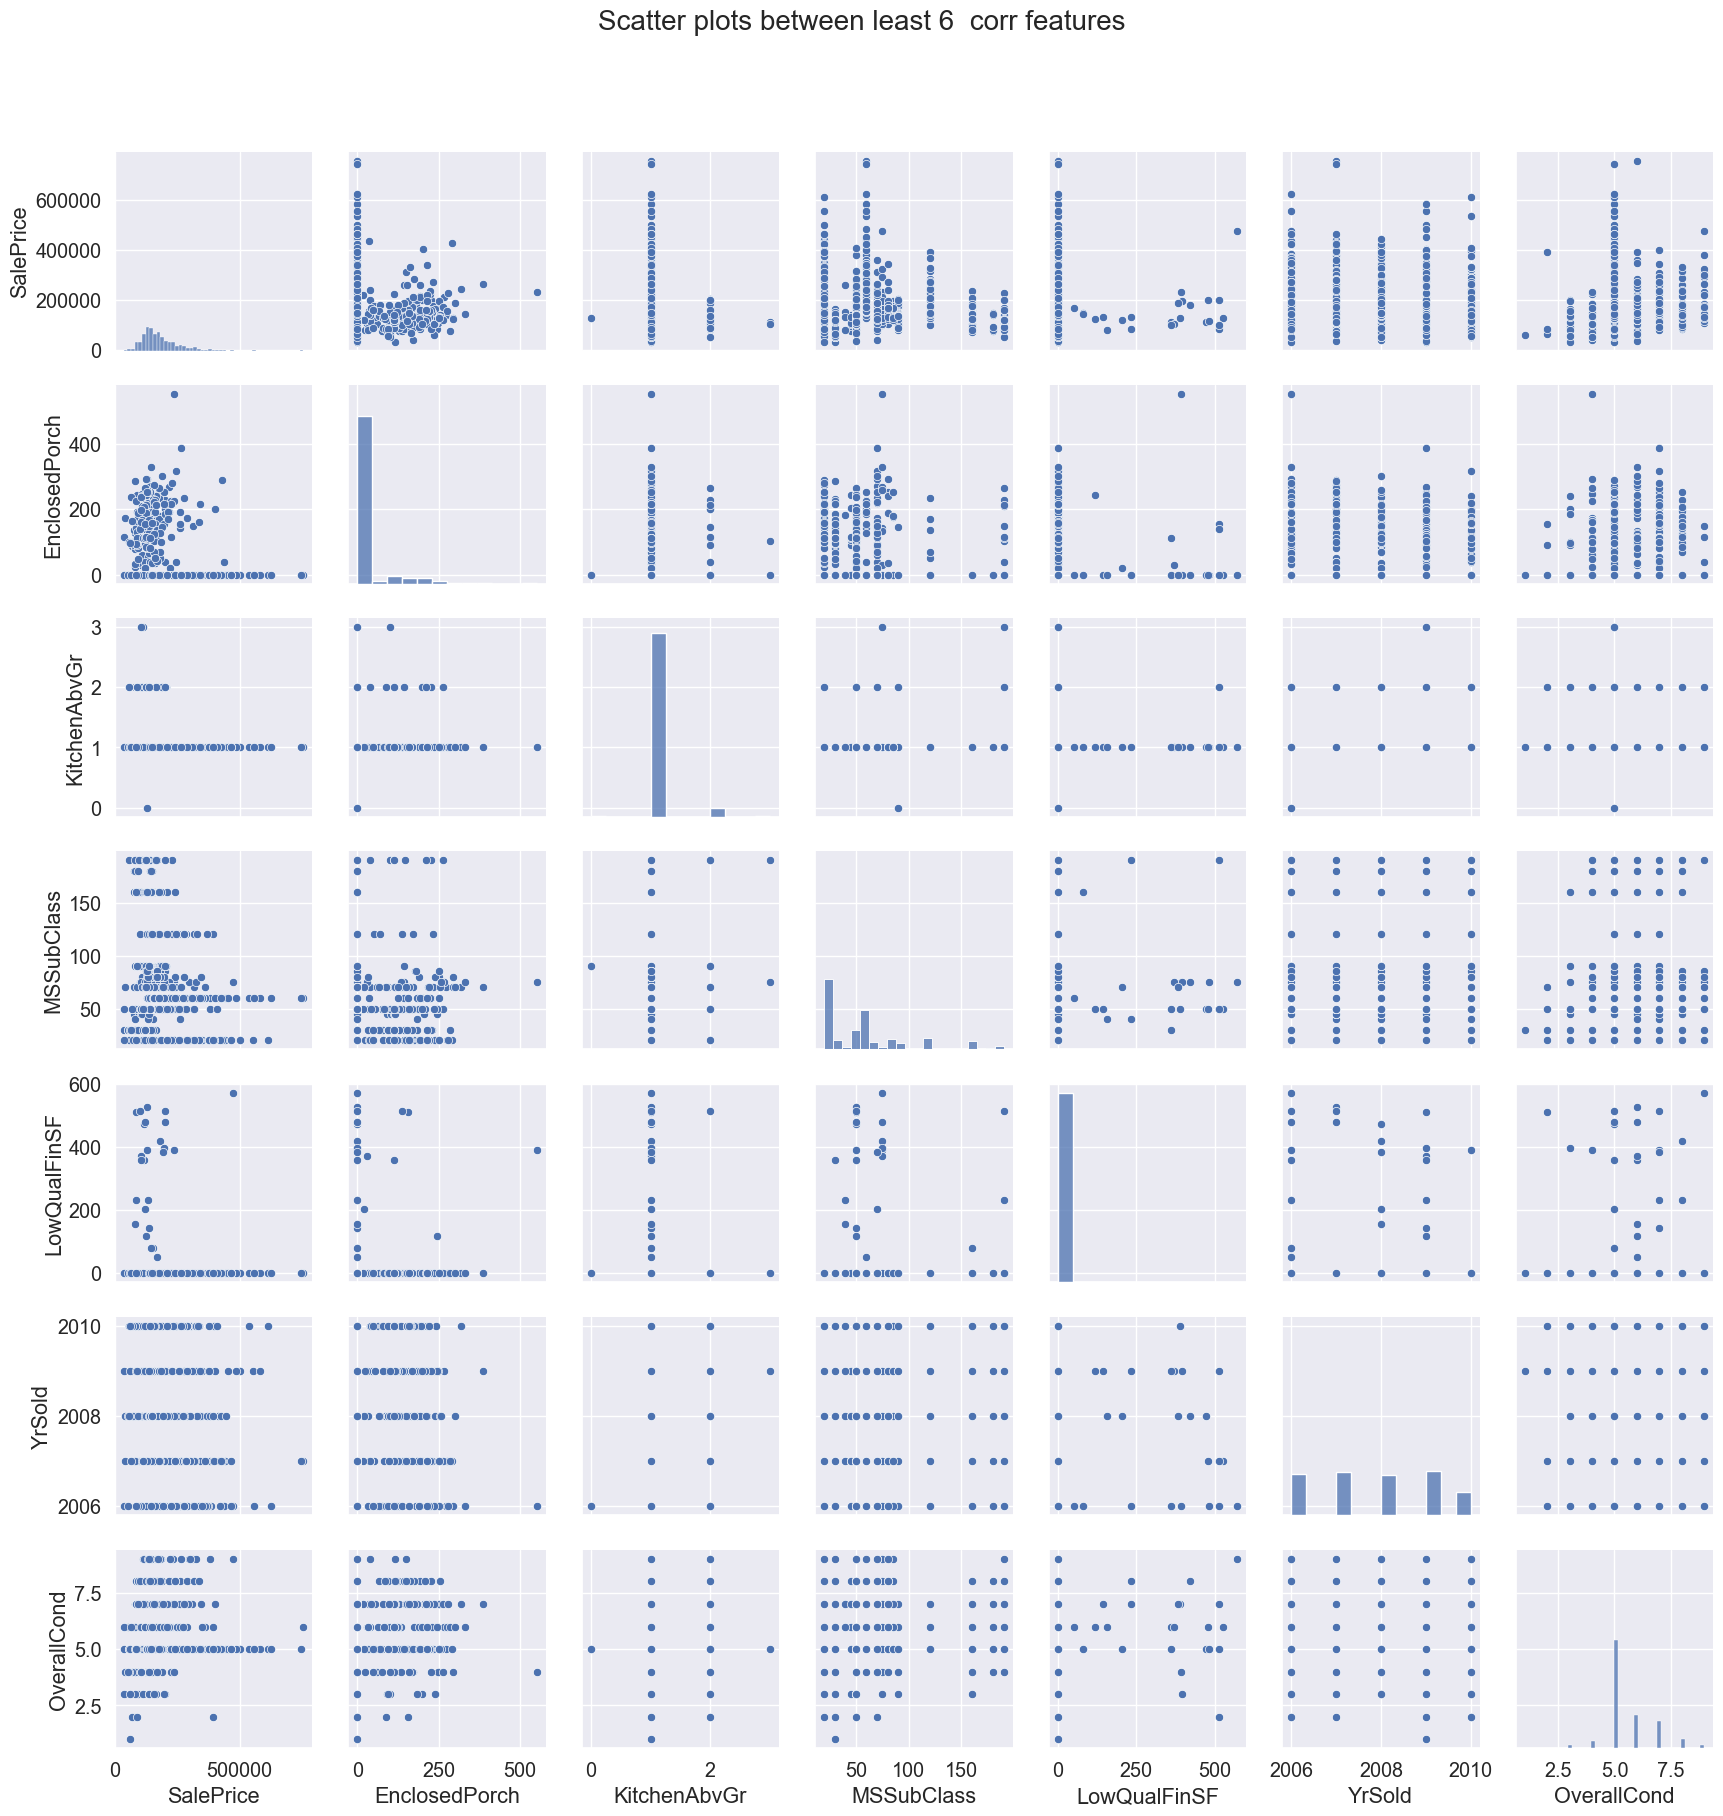

In [299]:
rcParams['figure.figsize'] = 5,5

cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']

sns_plot = sns.pairplot(train[cols])



plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)

plt.tight_layout()

plt.show()

In [302]:
#drop id as it is not required for training or prediction

train_ID = train['Id']

test_ID = test['Id']



train.drop(['Id'], axis=1, inplace=True)

test.drop(['Id'], axis=1, inplace=True)



train.shape, test.shape

((1460, 80), (1459, 79))

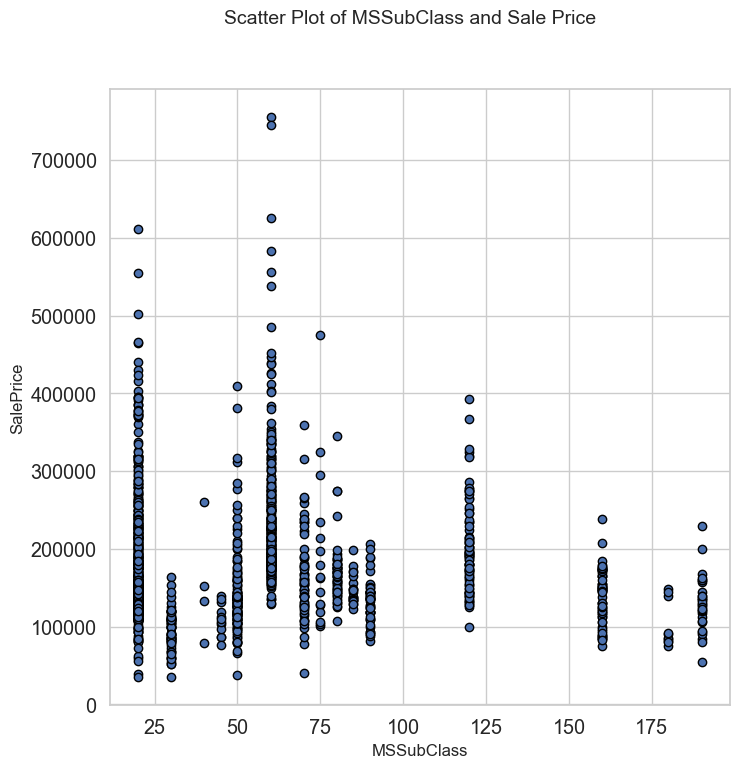

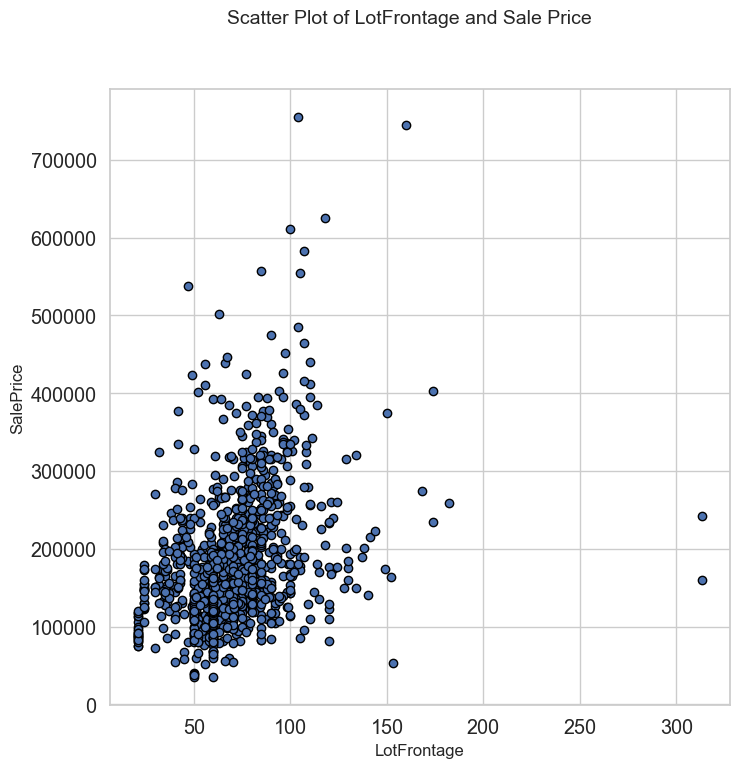

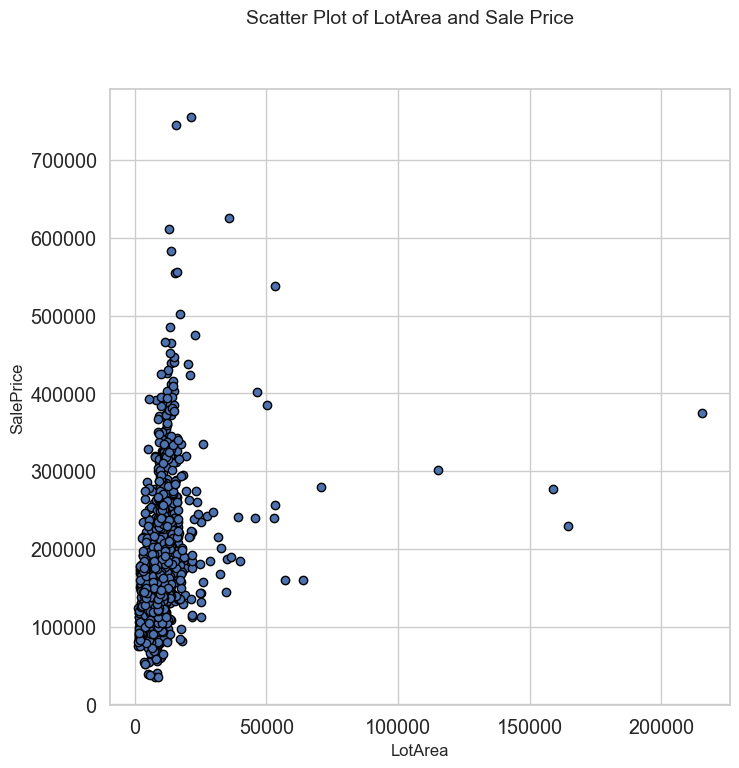

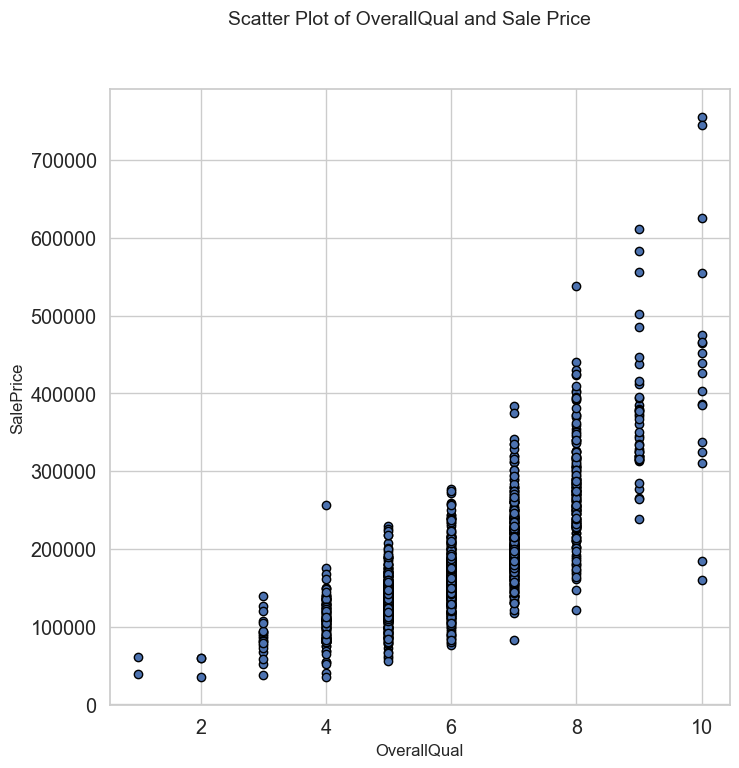

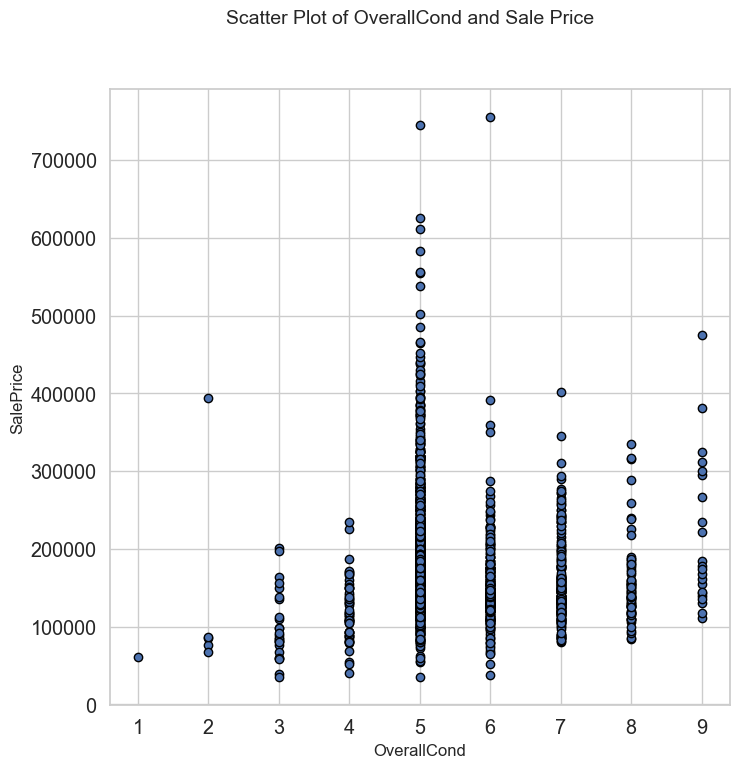

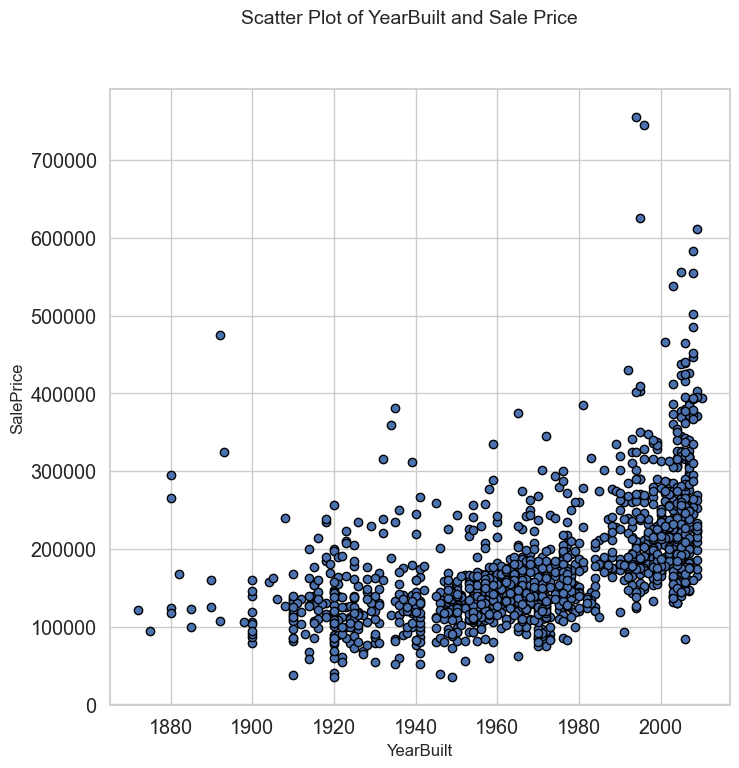

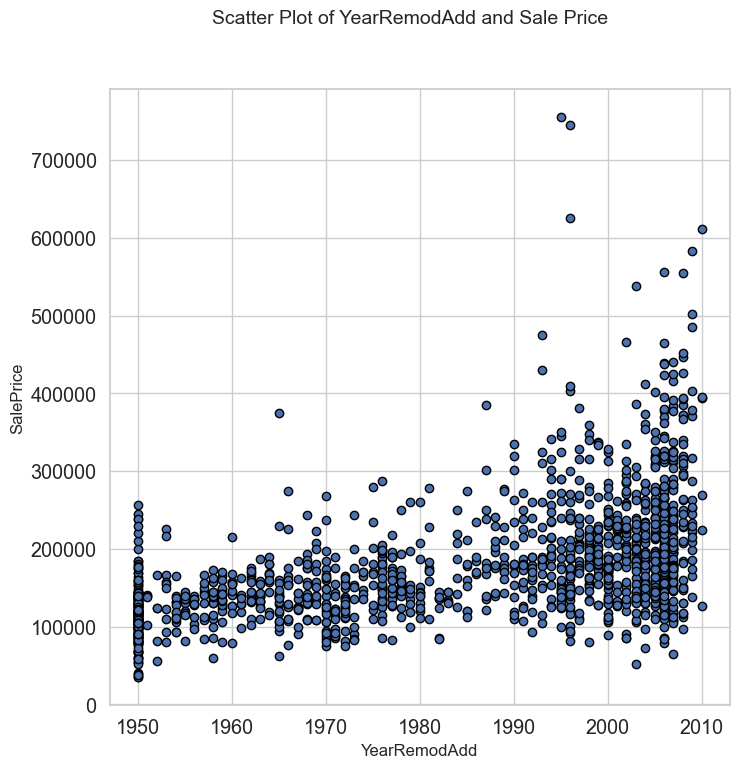

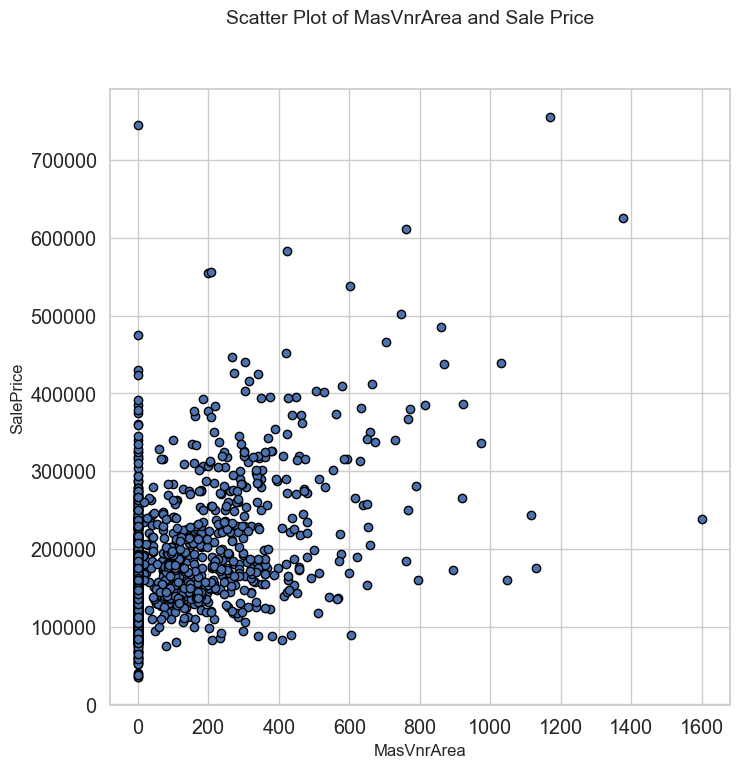

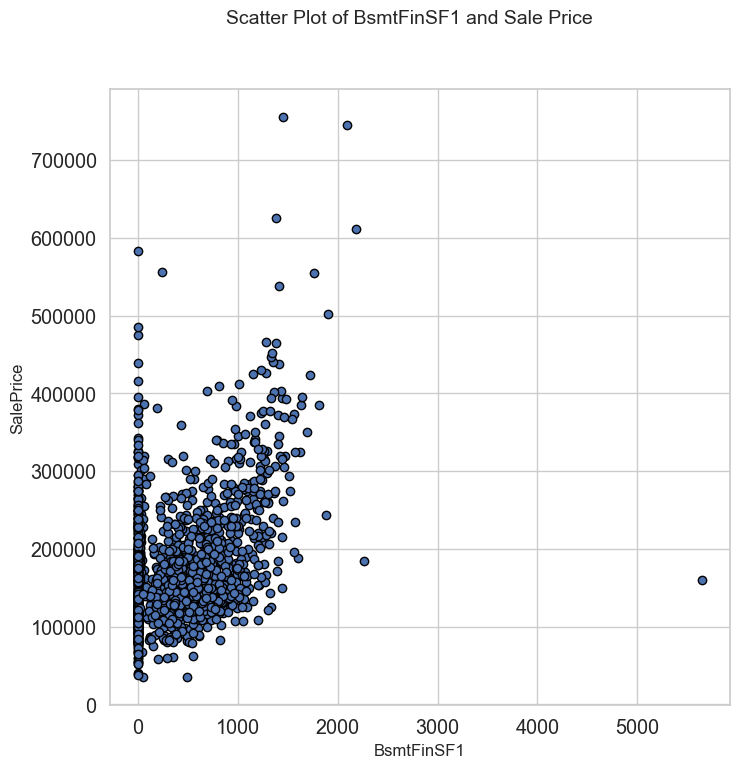

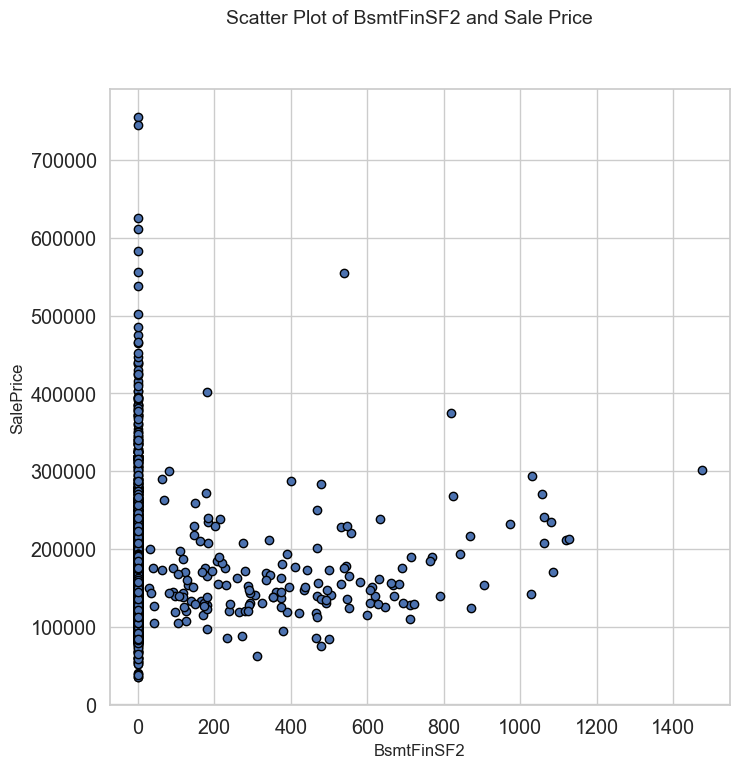

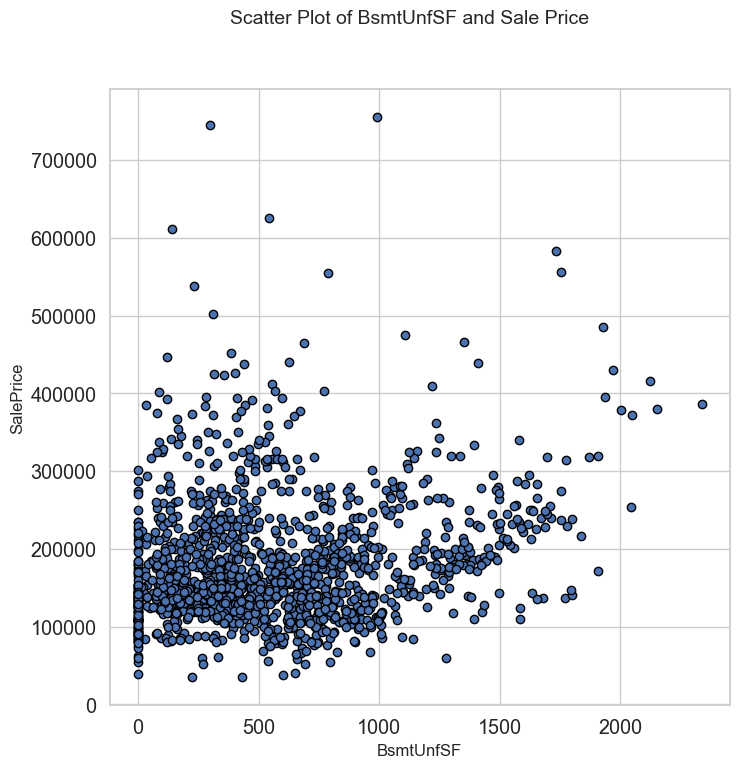

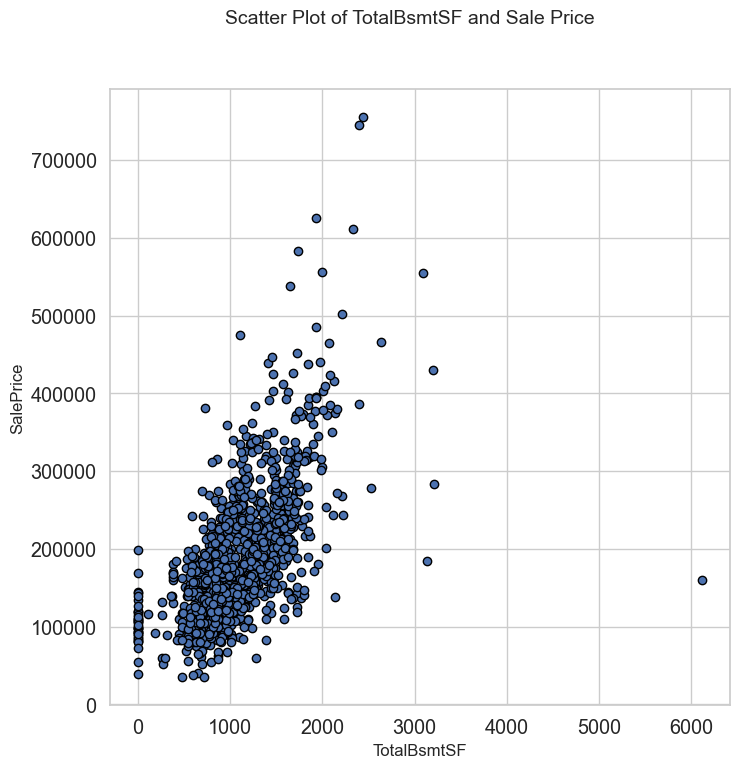

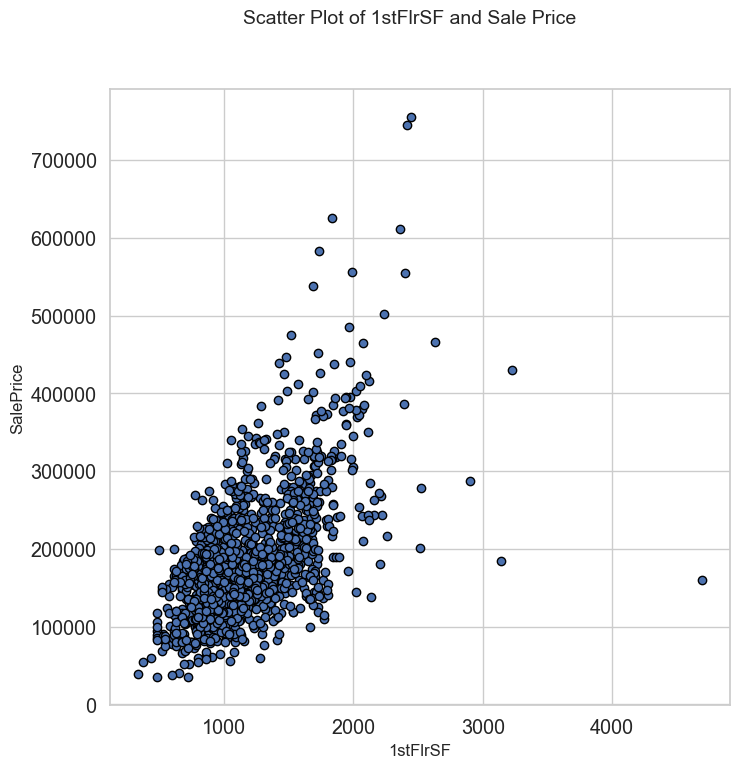

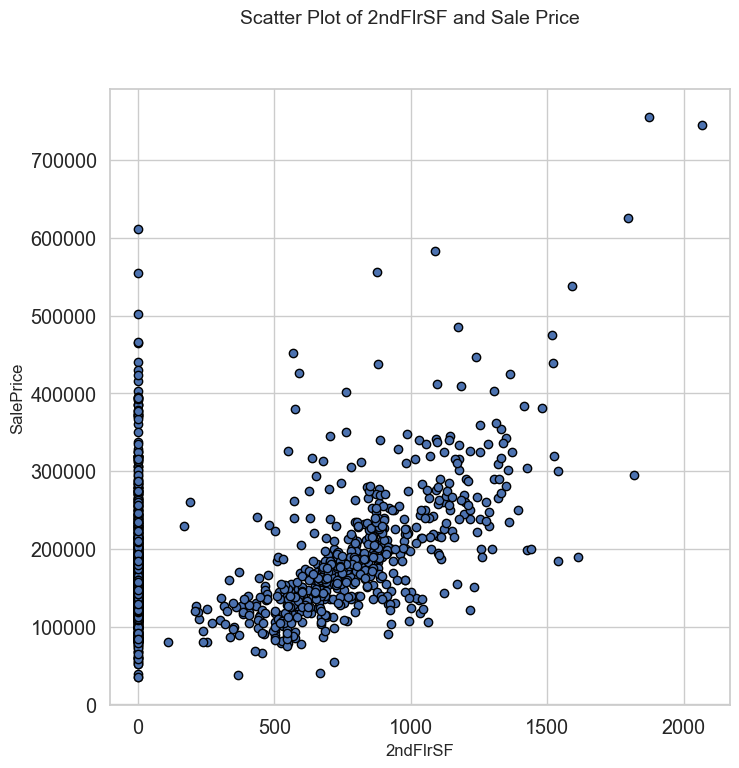

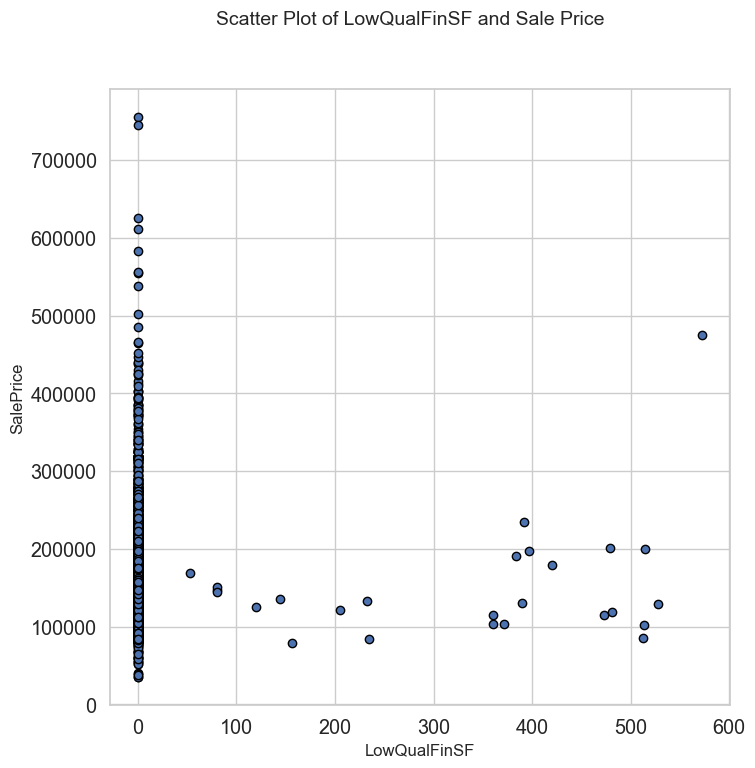

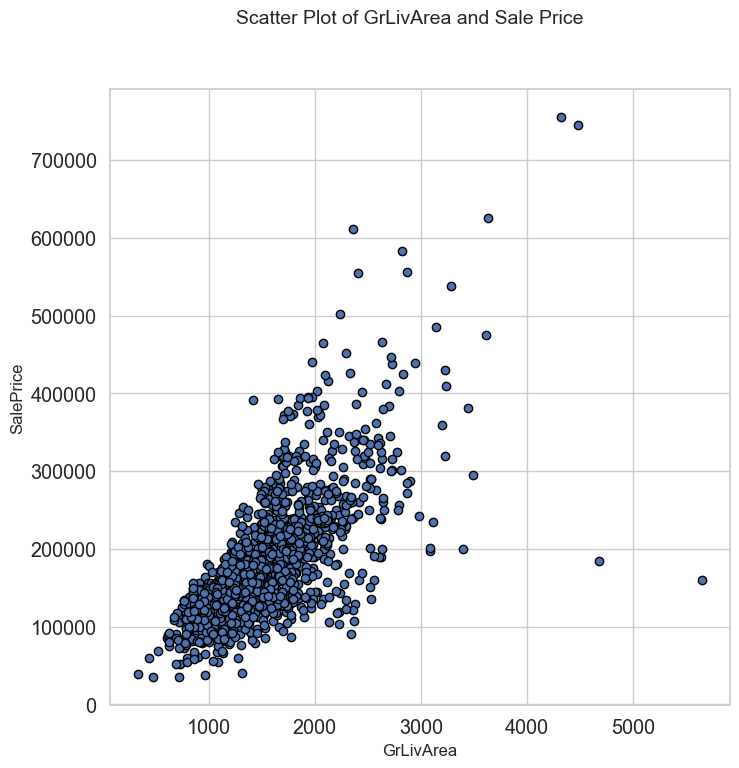

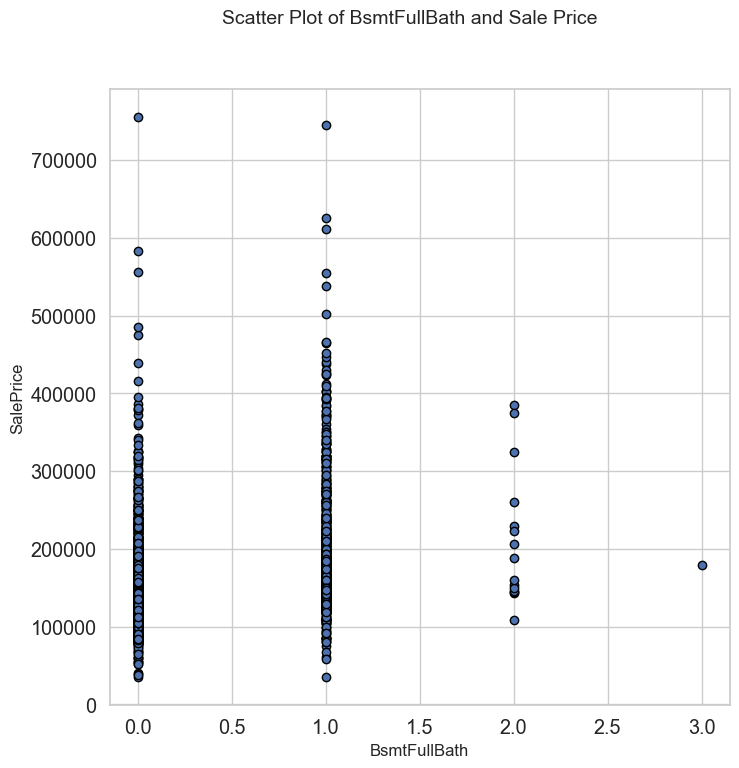

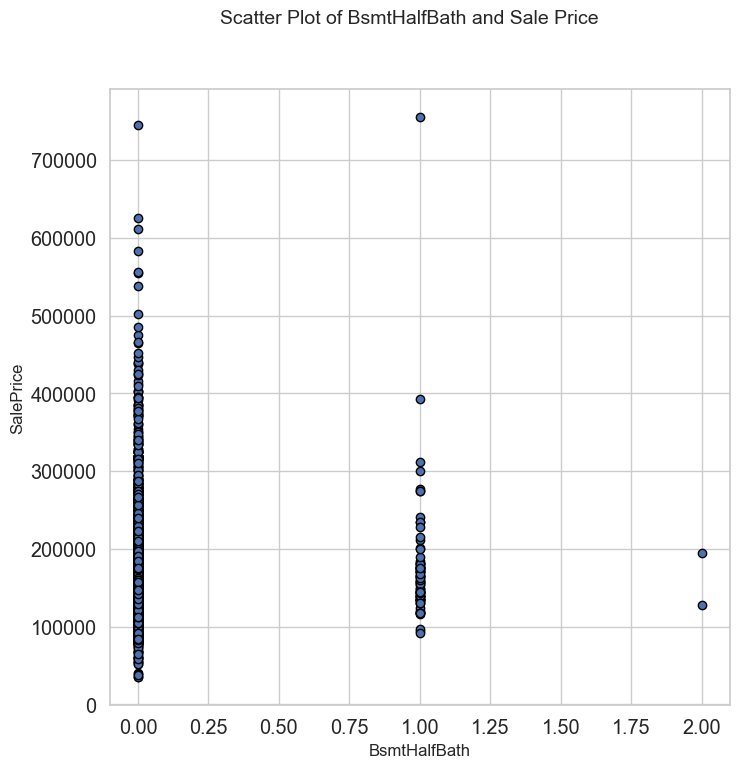

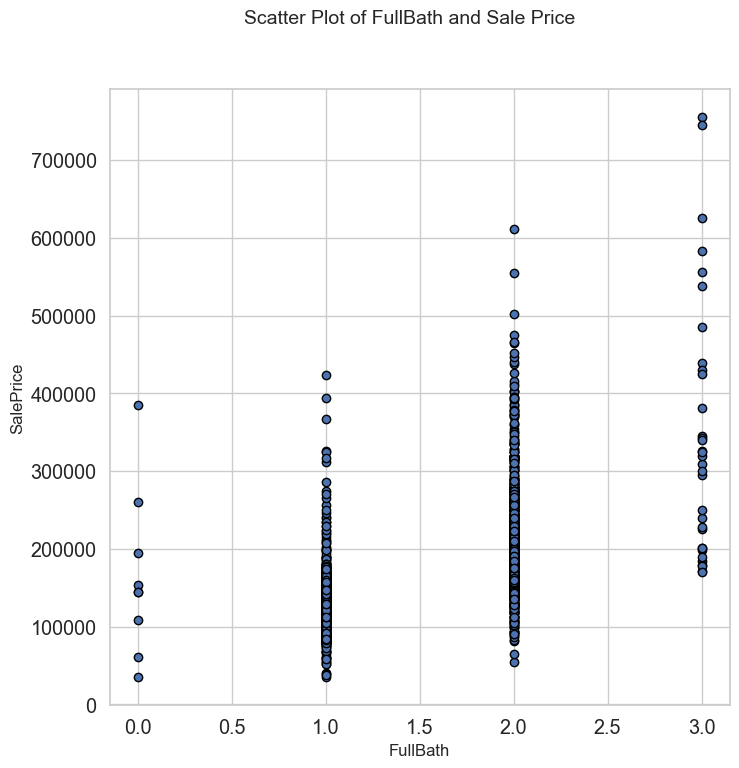

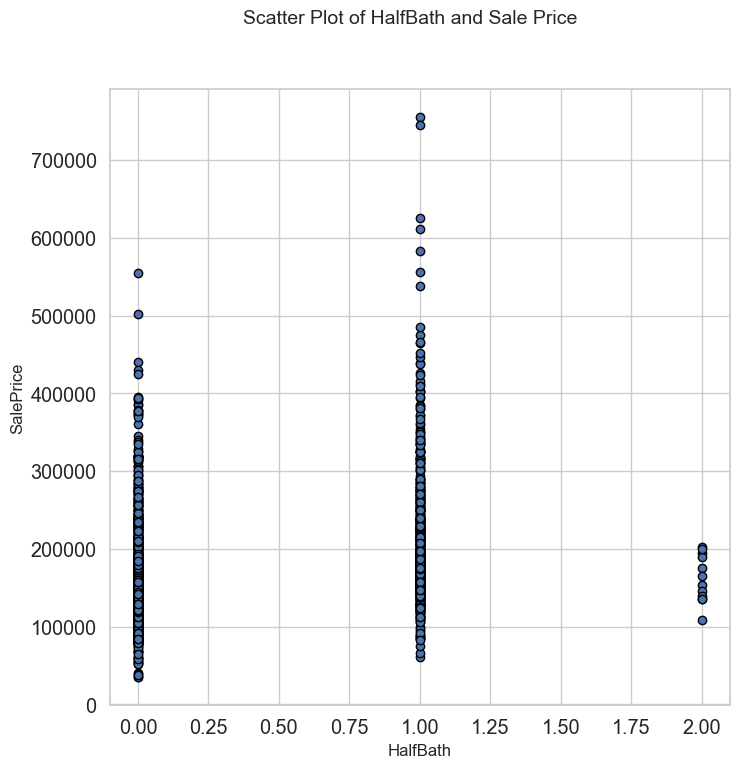

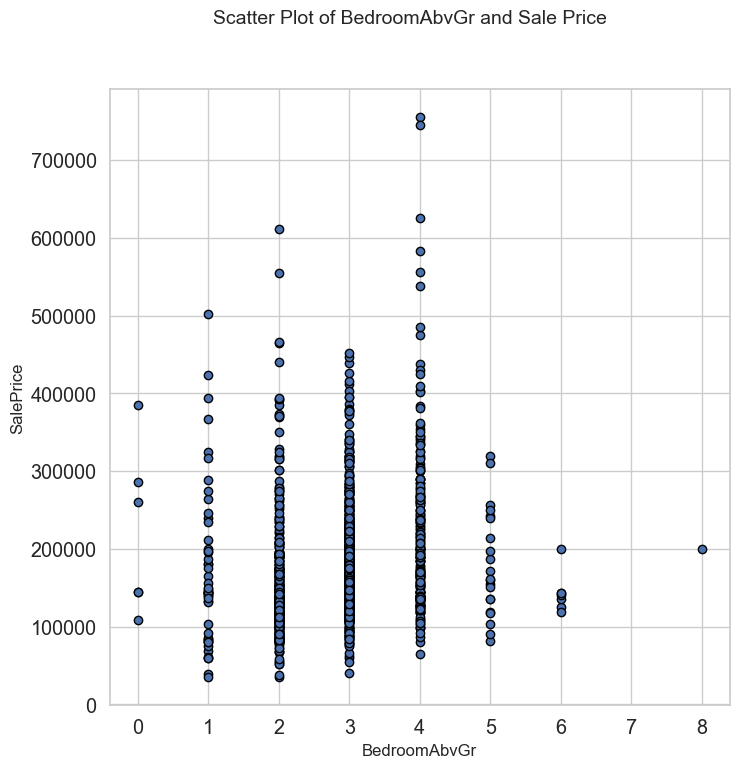

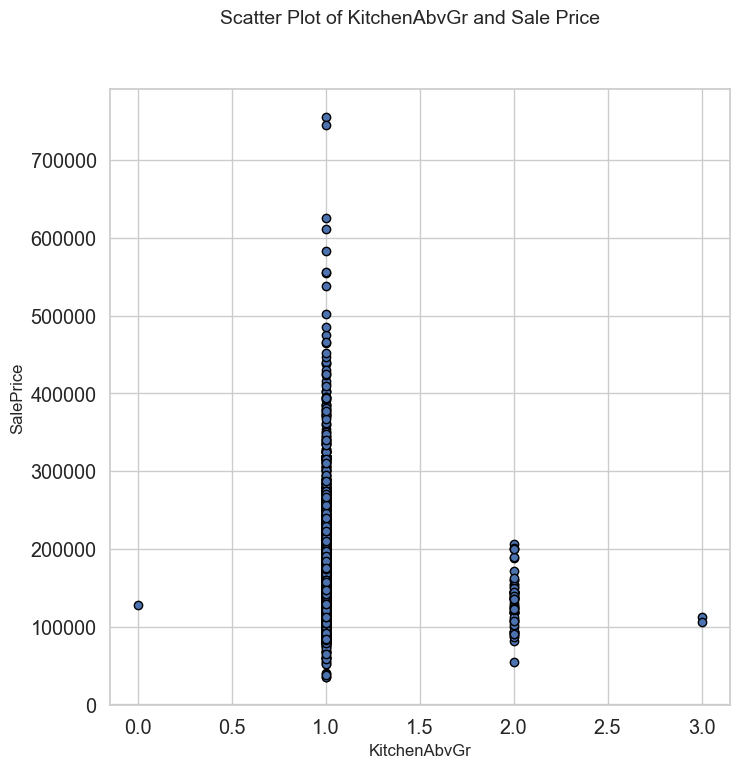

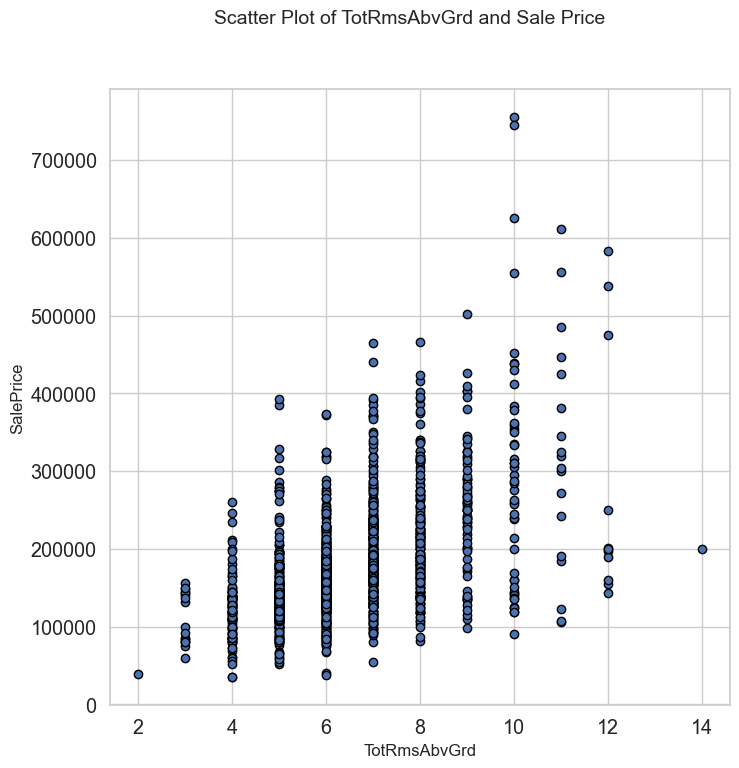

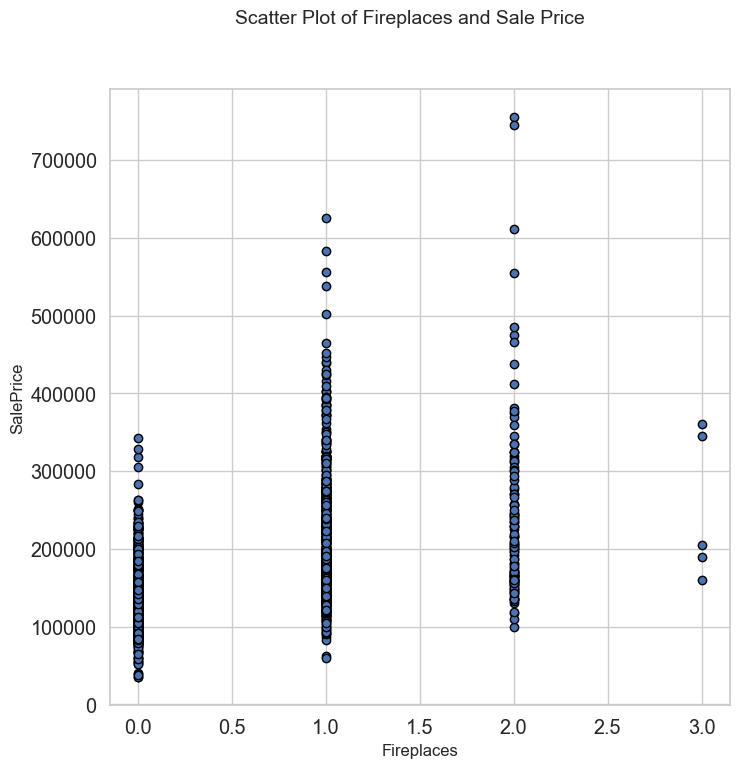

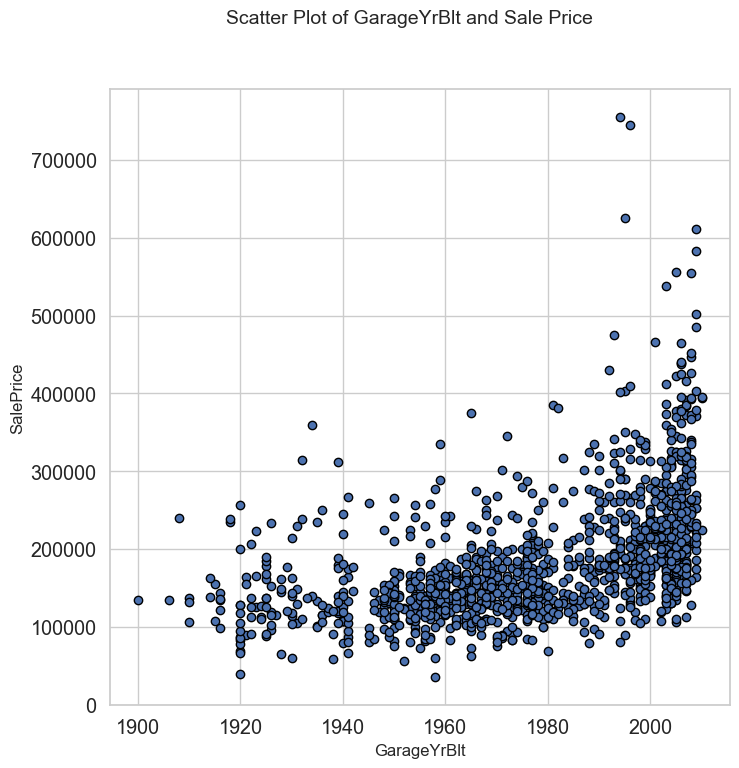

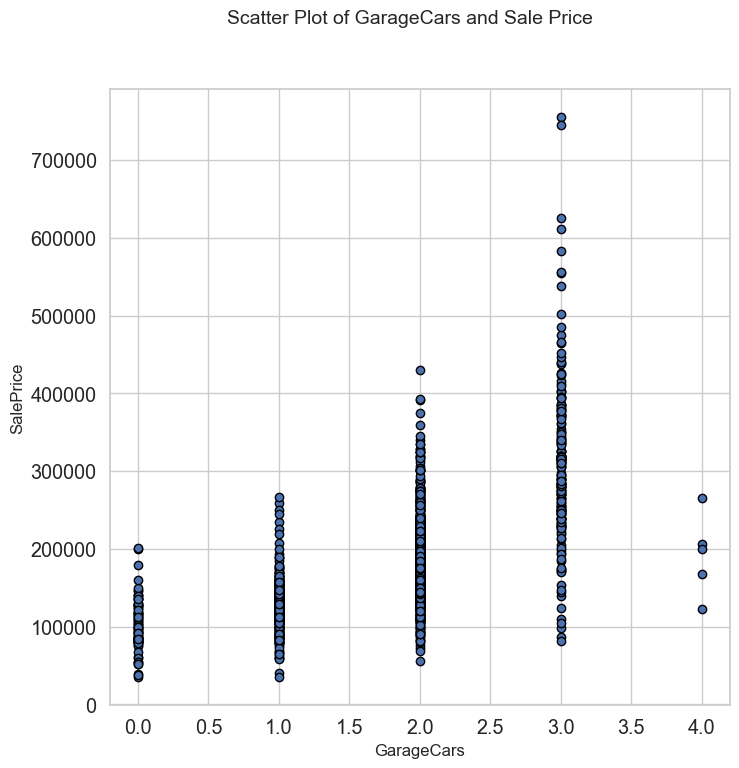

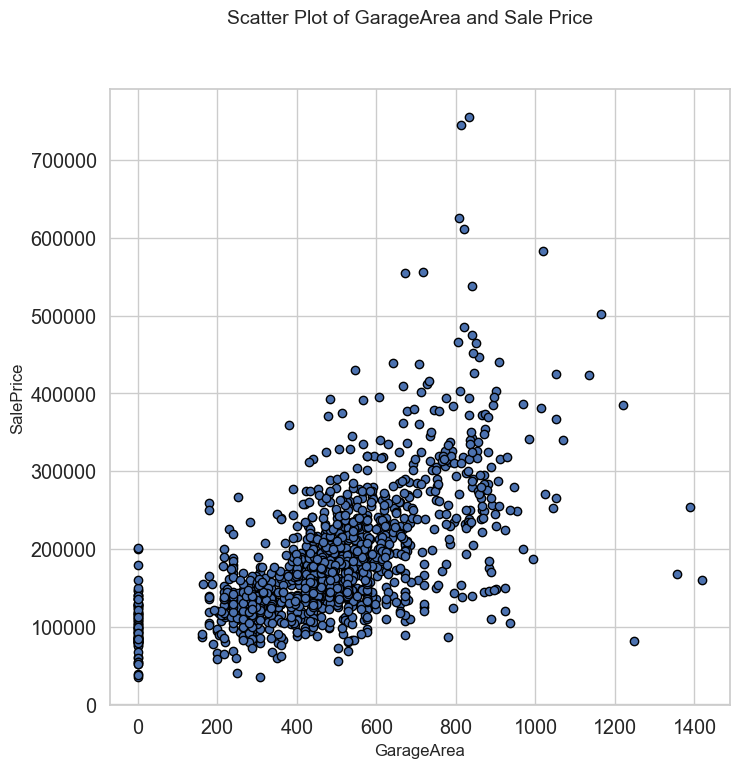

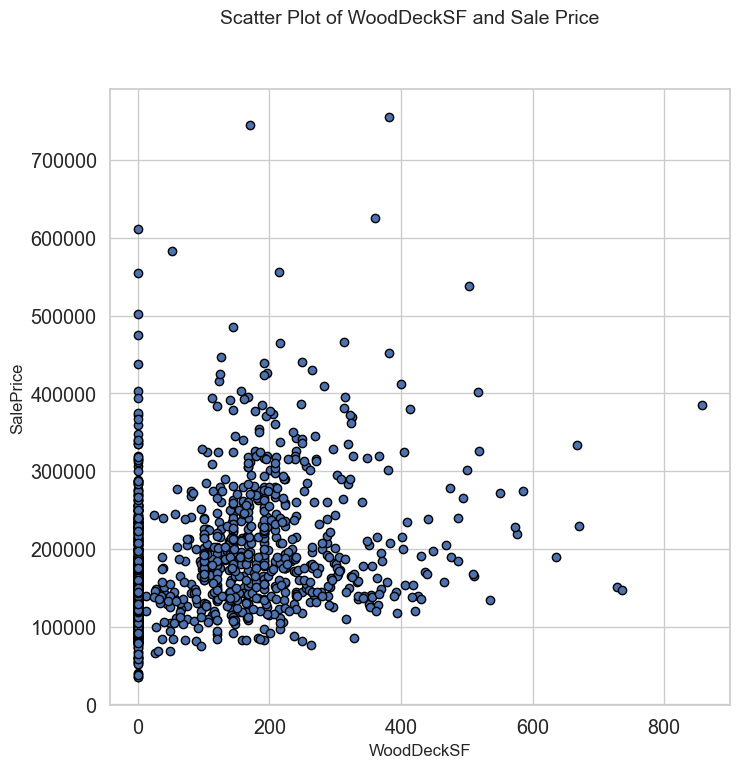

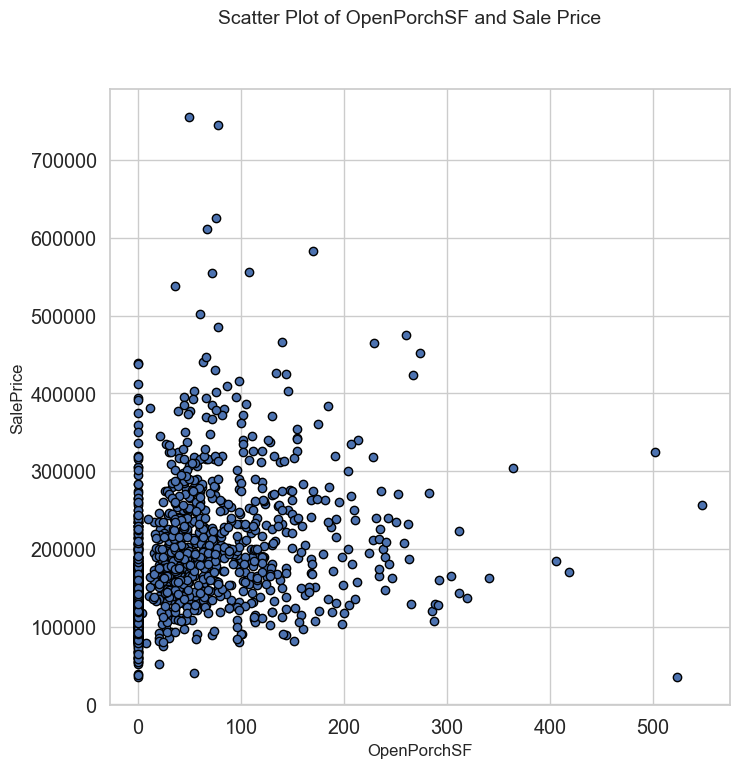

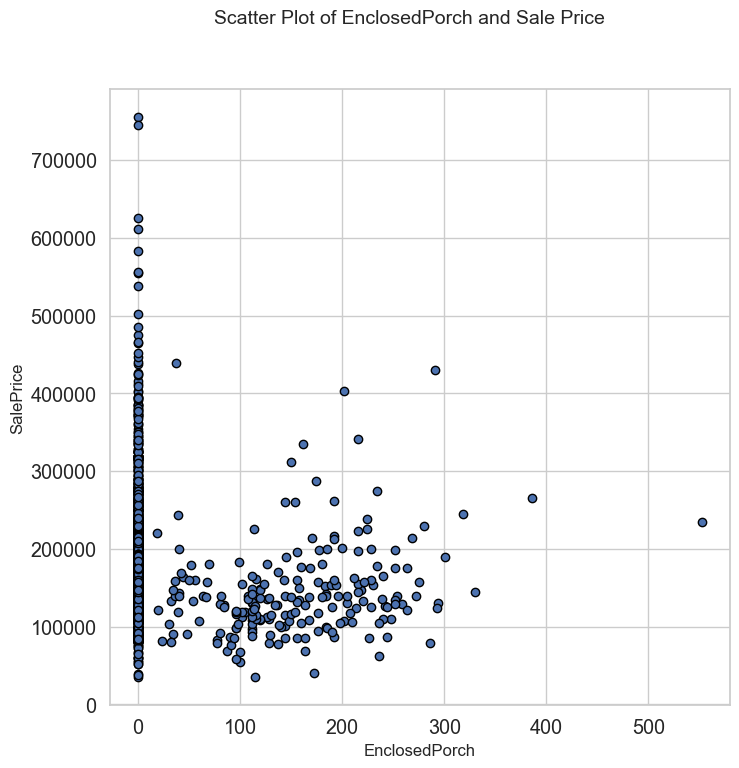

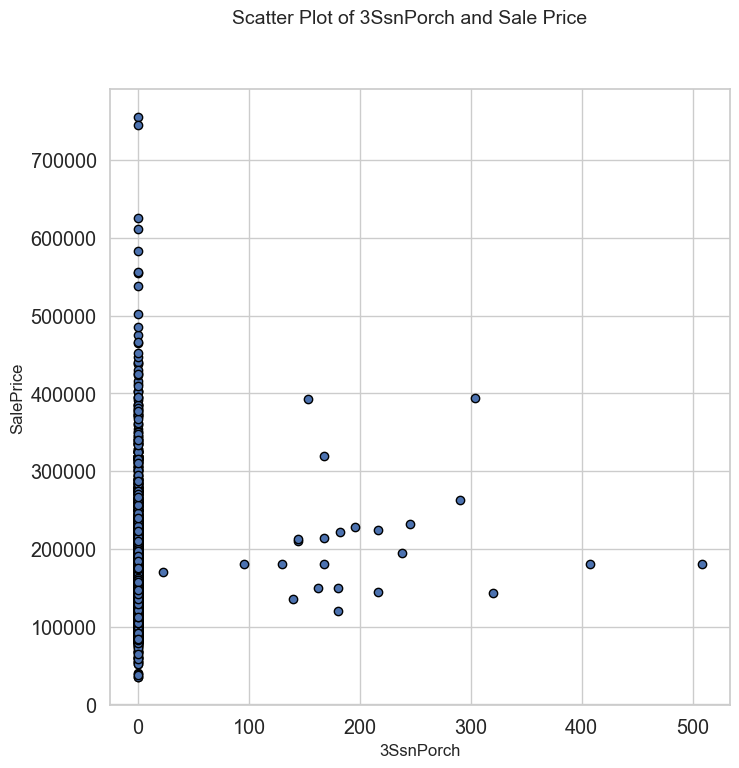

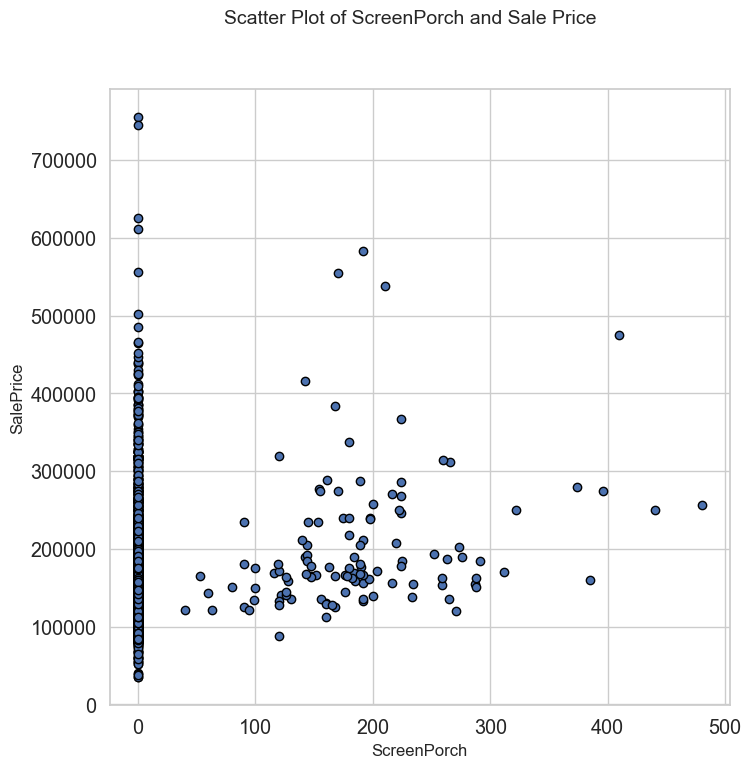

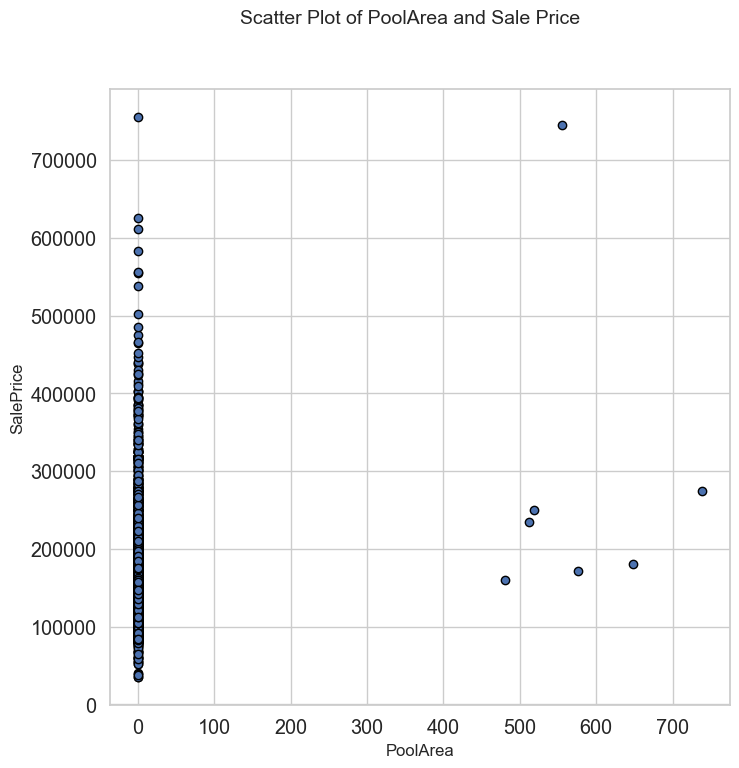

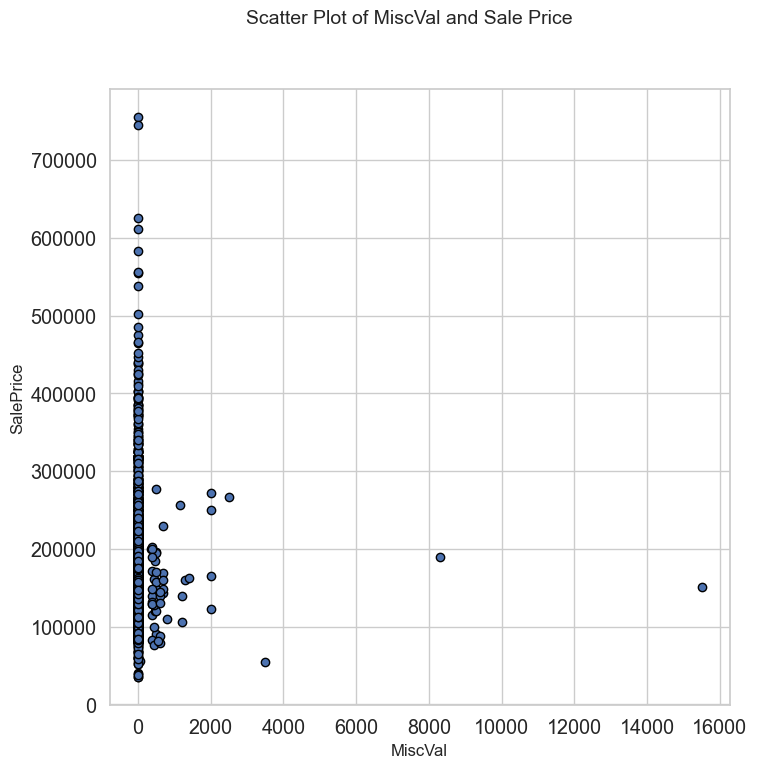

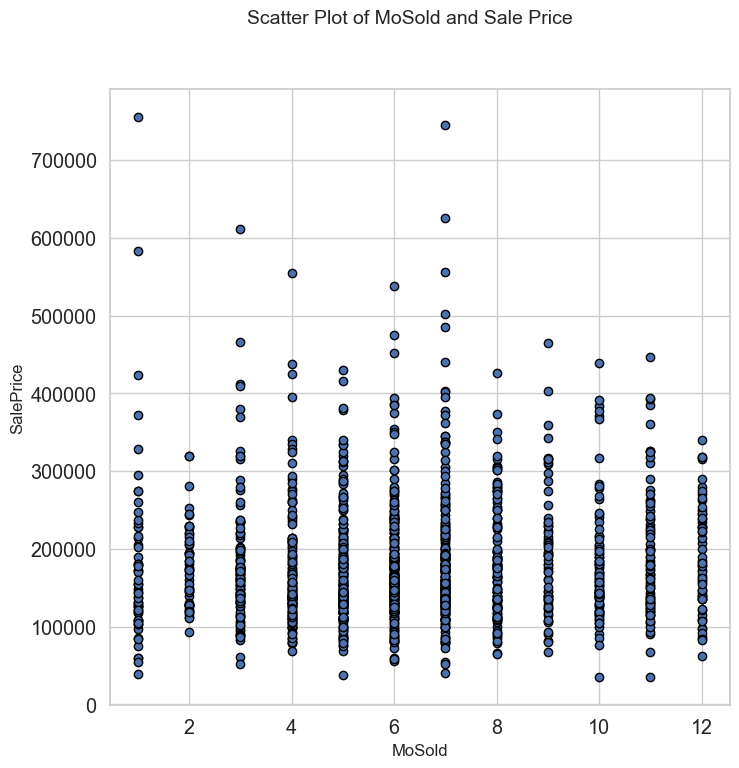

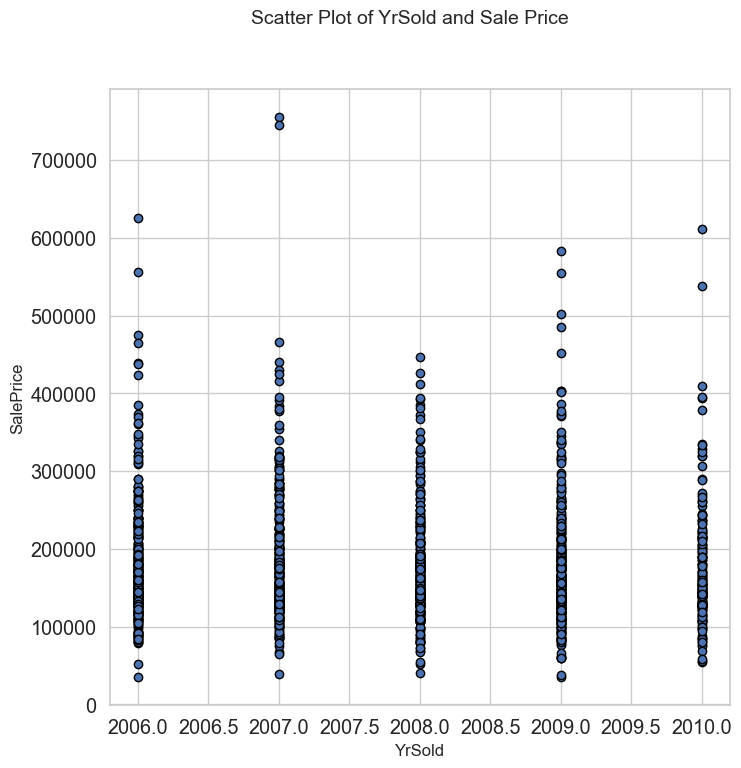

In [303]:
sns.set_style('whitegrid')
edgecolor = 'black'
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('SalePrice')
# Function to plot scatter plot between a feature and the Sale Price 
for a in numerical_cols:
    # Create a new figure for each scatter plot
    plt.figure(figsize=(8, 8))
    
    plt.scatter(x=train[a], y=train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of " + a + " and Sale Price", fontsize=14)
    plt.show()




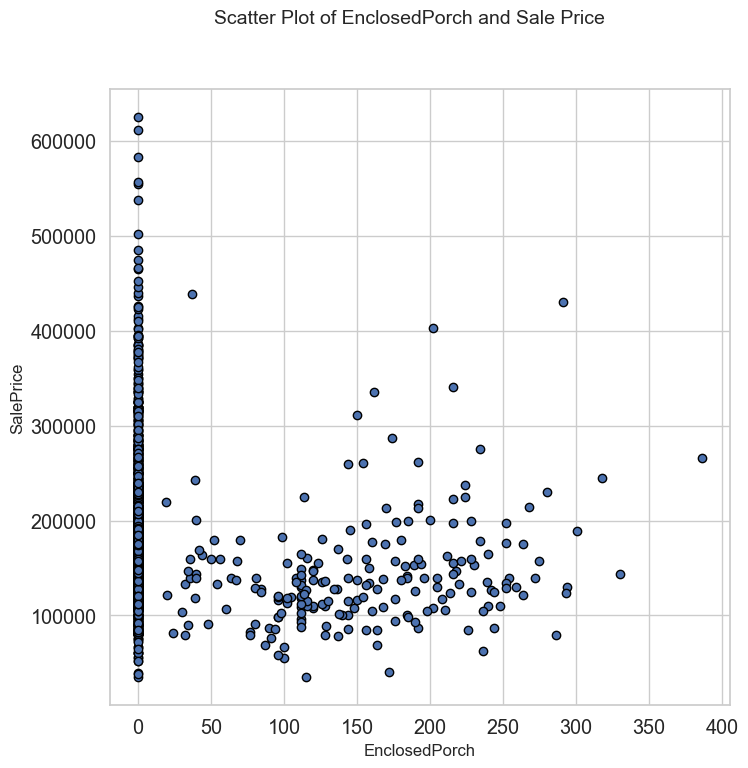

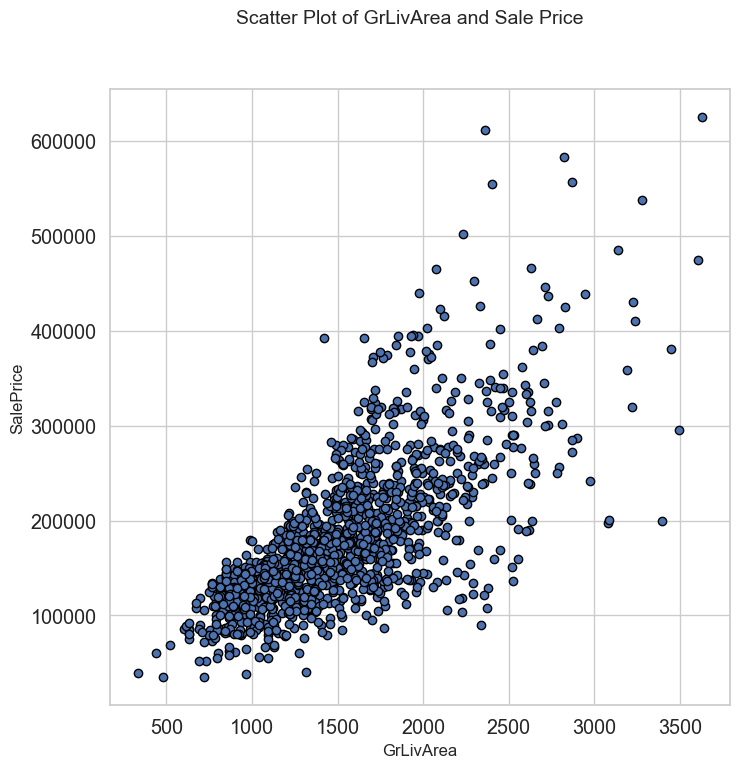

In [304]:
#Deleting outliers

train =  train.drop( train[( train['GrLivArea'] > 4000) & ( train['SalePrice']<300000)].index)

#Deleting outliers

train =  train.drop( train[( train['EnclosedPorch']>400)].index)

#Deleting outliers

train =  train.drop( train[( train['SalePrice']>700000)].index)

scatter_plot('EnclosedPorch')
scatter_plot('GrLivArea')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

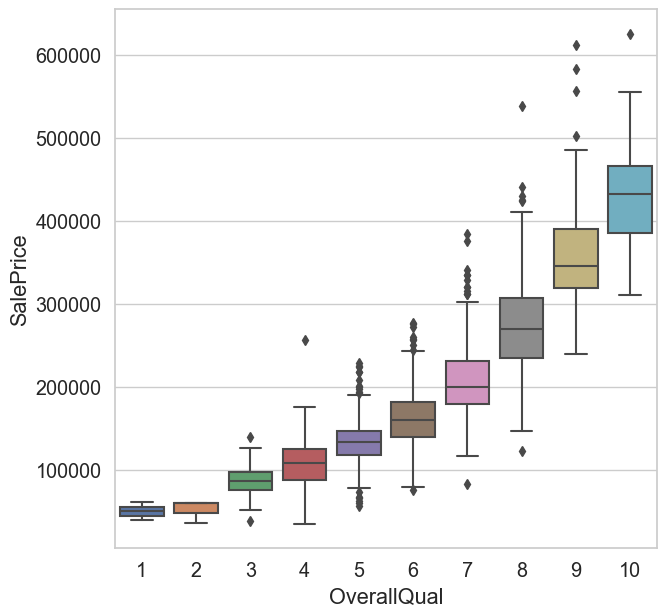

In [305]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))

data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)

sns.boxplot(x = train['OverallQual'], y="SalePrice", data = data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

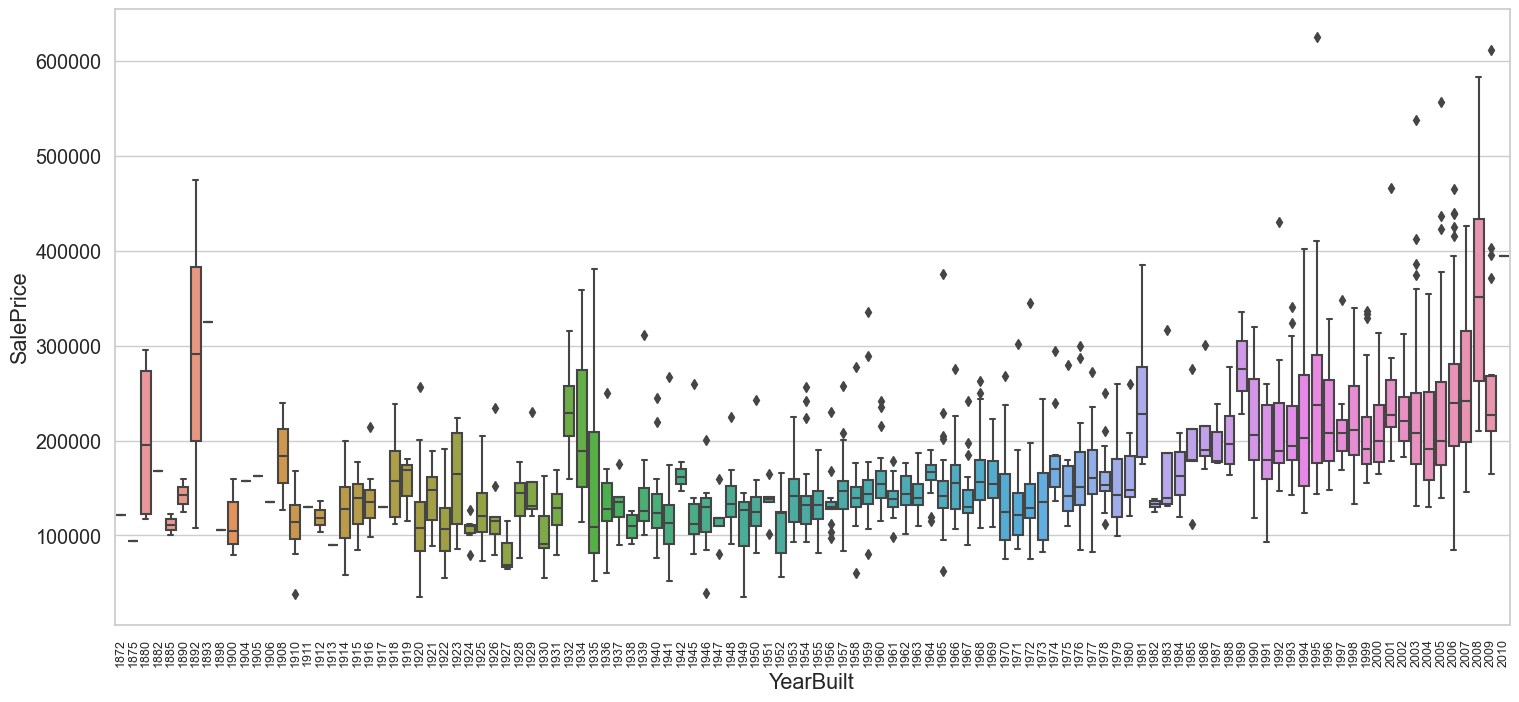

In [306]:
# plot a box plot for categorical feature : Year Built

fig = plt.figure(figsize=(18,8))



data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)

sns.boxplot(x= train['YearBuilt'], y="SalePrice", data=data)

plt.xticks(rotation=90,fontsize= 9)

Text(0.5, 0.98, 'Plot of Sale Price')

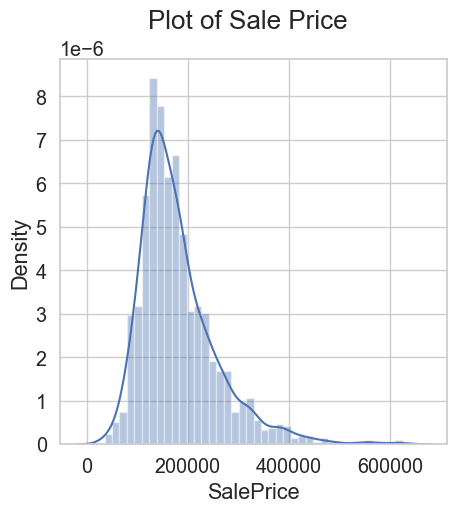

In [307]:
sns.distplot(train['SalePrice'])



plt.suptitle( "Plot of Sale Price")


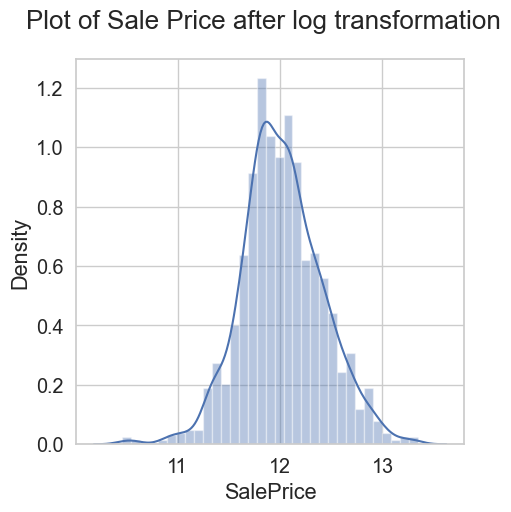

In [308]:
# applying log transformation to correct the positive skewness in the data

# taking logs means that errors in predicting expensive and cheap houses will affect the result equally



train['SalePrice'] = np.log(train['SalePrice'])

plt.suptitle("Plot of Sale Price after log transformation")

sns.distplot(train['SalePrice'])

plt.show()

In [309]:
train['SalePrice'].describe()


count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [310]:
train['SalePrice']


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [312]:
train.shape


(1455, 80)

In [313]:
#function to see the missing data in a dataframe

def missing_data(df,n):    

    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values

    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values

    No_unique_val = df.nunique()                                   # No of unique values

    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 

                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)

    

    print(missing_data.head(n))

In [314]:
missing_data(train,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
MasVnrType                        870         59.793814                 3
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageYrBlt                        81          5.567010                97
GarageCond                         81          5.567010                 5
GarageType                         81          5.567010                 6
GarageFinish                       81          5.567010                 3
GarageQual                         81          5.567010                 5
BsmtExposure                       38 

In [315]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

In [316]:
missing_data(test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageFinish                       78          5.346127                 3
GarageQual                         78          5.346127                 4
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45 

In [317]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [318]:
# calculate total number of null values in training data

null_train = train.isnull().sum().sum()

print(null_train)



# calculate total number of null values in test data

null_test = test.isnull().sum().sum()

print(null_test)

7812
7878


In [319]:
# save the 'SalePrice'column as train_label

train_label = train['SalePrice'].reset_index(drop=True)



# # drop 'SalePrice' column from train 

train = train.drop(['SalePrice'], axis=1)

# # now train contains all training features

In [320]:
# function to HANDLE the missing data in a dataframe

def missing (df):

    

    # drop theses columns due to large null values or many same values

    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)

    

    # Null value likely means No Fence so fill as "None"

    df["Fence"] = df["Fence"].fillna("None") 

    

    # Null value likely means No Fireplace so fill as "None"

    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

    

    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value

    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

    

    # Null value likely means  typical(Typ)

    df["Functional"] = df["Functional"].fillna("Typ")

    

    # Only one null value so fill as the most frequent value(mode)

    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  

    

    # Only one null value so fill as the most frequent value(mode)

    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    

    # Very few null value so fill with the most frequent value(mode)

    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

    

    # Null value likely means no masonry veneer

    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)

    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o

    

    # Only one null value so fill as the most frequent value(mode)

    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

    

    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)

    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

    

    #Null value likely means no Identified type of dwelling so fill as "None"

    df['MSSubClass'] = df['MSSubClass'].fillna("None")

    

    # Null value likely means No Garage, so fill as "None" (since these are categorical features)

    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):

        df[col] = df[col].fillna('None')

    

    # Null value likely means No Garage and no cars in garage, so fill as 0

    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):

        df[col] = df[col].fillna(0)

    

    # Null value likely means No Basement, so fill as 0

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):

        df[col] = df[col].fillna(0)

    

    # Null value likely means No Basement, so fill as "None" (since these are categorical features)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):

        df[col] = df[col].fillna('None')

    

    return df


In [321]:
train = missing(train)

test = missing(test)

In [324]:
# calculate total number of null values in training data

null_train = train.isnull().sum().sum()

print(null_train)



# calculate total number of null values in test data

null_test = test.isnull().sum().sum()

print(null_test)

0
0


In [325]:
train.shape,test.shape


((1455, 75), (1459, 75))

In [326]:
def add_new_cols(df):

    

    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']



    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 

                             + (0.5 * df['BsmtHalfBath']))



    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 

                            df['ScreenPorch'] + df['WoodDeckSF'])



    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])

    

    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']

    

    return df


In [327]:
# add the new columns

train = add_new_cols(train)

test = add_new_cols(test)

In [328]:
train.shape,test.shape


((1455, 80), (1459, 80))

In [329]:
#get dummy values for categorical data

train = pd.get_dummies(train)

test = pd.get_dummies(test)



print(train.shape)

print(test.shape)

(1455, 292)
(1459, 278)


In [330]:
#align the training and testing data

train, test = train.align(test, join = 'inner', axis=1)

In [331]:
print(train.shape)

print(test.shape)

(1455, 278)
(1459, 278)


In [332]:
X_test = test

In [333]:
train["SalePrice"] = train_label

In [334]:
train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0          2003       196.0         706           0  ...         False   
1          1976         0.0         978           0  ...         False   
2          2002       162.0         486           0  ...         False   
3          1970         0.0         216           0  ...         False   
4          2000       350.0         655           0  ...         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         False         True                  False                  False   
1         False         True                  False                  False   
2         False         True                  False                  False   
3         False         True                   True                  False   
4         False         True                  False                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

   SaleCondition_Partial  SalePrice  
0                  False  12.247694  
1                  False  12.109011  
2                  False  12.317167  
3                  False  11.849398  
4                  False  12.429216  

[5 rows x 279 columns]

In [335]:
train_set, valid_set = train_test_split(train,train_size= 0.7, shuffle=False)



X_train = train_set.drop(["SalePrice"], axis=1)  # training features

y_train = train_set["SalePrice"].copy()             # training label



X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features

y_valid = valid_set["SalePrice"].copy()               # testing label

In [336]:
print("X_train shape: {}".format(X_train.shape))

print("y_train shape: {}".format(y_train.shape))

print()

print("X_valid shape: {}".format(X_valid.shape))

print("y_valid shape: {}".format(y_valid.shape))

print()

print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 278)
y_train shape: (1018,)

X_valid shape: (437, 278)
y_valid shape: (437,)

X_test shape: (1459, 278)


In [337]:
null_t_x = X_train.isnull().sum().sum()

print(null_t_x)



null_t_y = y_train.isnull().sum().sum()

print(null_t_y)


null_v_x = X_valid.isnull().sum().sum()

print(null_v_x)



null_v_y = y_valid.isnull().sum().sum()

print(null_v_y)

0
0
0
5


In [338]:
# replace null values by mean value of y_valid column

mean = np.nanmean(y_valid)

y_valid = np.nan_to_num(y_valid,nan = mean)

In [339]:
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [340]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Initialize variables to track the best model
best_model = None
best_model_name = ""
best_rmse = float("inf")

# Evaluate models
results = {}
for model_name, model in models.items():
    # Fit model and calculate validation RMSE
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    # Calculate cross-validation RMSE
    cross_val_rmse = -cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5).mean()
    results[model_name] = {'Validation RMSE': rmse, 'Cross-Validation RMSE': cross_val_rmse}
    
    # Check if this model has the lowest cross-validation RMSE
    if cross_val_rmse < best_rmse:
        best_rmse = cross_val_rmse
        best_model = model
        best_model_name = model_name

# Display results for each model
print("Results for each model:")
for model_name, scores in results.items():
    print(f"{model_name}: Validation RMSE = {scores['Validation RMSE']}, Cross-Validation RMSE = {scores['Cross-Validation RMSE']}")

# Output the best model
print(f"\nBest Model: {best_model_name} with Cross-Validation RMSE = {best_rmse}")



Results for each model:
Linear Regression: Validation RMSE = 0.4279348039715761, Cross-Validation RMSE = 0.5119776154315281
Ridge: Validation RMSE = 0.41720120615759587, Cross-Validation RMSE = 0.478202404033868
Lasso: Validation RMSE = 0.38605401013102986, Cross-Validation RMSE = 0.4119845961364933
Decision Tree: Validation RMSE = 0.584556348626492, Cross-Validation RMSE = 0.6117035673313636
Random Forest: Validation RMSE = 0.3909786261222374, Cross-Validation RMSE = 0.4196657312334356
Gradient Boosting: Validation RMSE = 0.4003456671149845, Cross-Validation RMSE = 0.4296391093213508
XGBoost: Validation RMSE = 0.4389475248301046, Cross-Validation RMSE = 0.4677888161898676

Best Model: Lasso with Cross-Validation RMSE = 0.4119845961364933


In [341]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('svr', SVR()),
    ('knn', KNeighborsRegressor()),
    ('ridge', Ridge())
]

# Define the final estimator as Random Forest
final_estimator = RandomForestRegressor()

# Create the stacked model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict on the validation set and calculate RMSE
y_pred = stacked_model.predict(X_valid)
stacked_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

# Output the RMSE of the stacked model
print(f"Stacked Model Validation RMSE: {stacked_rmse}")

# Predict on X_test using the stacked model
y_final_pred_1 = stacked_model.predict(X_test)
predictions_1 = np.expm1(y_final_pred_1)
submit_1 = pd.DataFrame()

submit_1['Id'] = test_ID

submit_1['SalePrice'] = predictions_1

submit_1.to_csv('submission_1.csv',index=False)


Stacked Model Validation RMSE: 0.40685252339633304


In [342]:
# Predict on X_test using the best model
y_final_pred = best_model.predict(X_test)

y_final_pred

array([12.04342449, 12.05551109, 12.03881314, ..., 12.07131958,
       11.87579118, 12.0879231 ])

In [343]:
#undo the log tranformation to get predictions in terms of original label

predictions = np.expm1(y_final_pred)

print(predictions)

[169977.03345707 172043.95554065 169195.00917363 ... 174785.33766408
 143743.28198881 177711.63237685]


In [344]:
submit = pd.DataFrame()

submit['Id'] = test_ID

submit['SalePrice'] = predictions

submit.to_csv('submission.csv',index=False)

In [345]:
submit

Id      SalePrice
0     1461  169977.033457
1     1462  172043.955541
2     1463  169195.009174
3     1464  170270.840787
4     1465  166225.254965
...    ...            ...
1454  2915  140837.097896
1455  2916  153828.012466
1456  2917  174785.337664
1457  2918  143743.281989
1458  2919  177711.632377

[1459 rows x 2 columns]